<div style="background-color: #004B87; padding: 20px; border-radius: 10px;">
    <img src="https://cdn-assets-us.frontify.com/s3/frontify-enterprise-files-us/eyJwYXRoIjoibWlsbGltYW5cL2ZpbGVcL2l3dHhYOHJqV3pVUUV0R3hLc0FGLnN2ZyJ9:milliman:1F1qJpvDxGMTndryYS7nEiCYPRFCCi7l2rEhgnpdkGo?width=2400" width="300" height="150" alt="SVG Image" />
    <center>
        <h1 style="color:#FFFFFF;">IABE Data Science Certificate - Module 2 - Session 2</h1>
    </center>
    <center>
        <h2 style="color:#FFFFFF;">Programming: Decision trees</h2>
    </center>
    <center>
        <h2 style="color:#FFFFFF;">13th February, 2024</h2>
    </center>
    <center>
        <h2 style="color:#FFFFFF;"></h2>
    </center>
</div>

# 1. Introduction<a name="Introduction"></a>
  
Welcome to the first programming session of the second module of the Actuarial Data Scientist training program. This class continues a series of twelve practical sessions divided into three main modules. These presentations aim to concretely illustrate how a variety of data science techniques can be applied in an actuarial context.
<br />
<br />
This session will initiate a serie of three sessions focused on decision trees and its extensions (e.g. bagging, random forest, gradient boosting). As an introduction, the session will present how decisions trees work for classification and regression purposes. To do so, loss functions, parameter-tuning and the high variability of decision trees will also be discussed.   

To illustrate the session, a dataset containing data on salary is first introduced. Subsequently, the two linked French MTPL data sets on frequency and severity of motor insurance claims, which have already been used in previous sessions, will be considered.

<ins>**Overview**</ins>
1. [Introduction](#Introduction)<br />
2. [Overview](#overview)<br />
    2.1. [Decision trees](#decision_tree)<br />
    2.2. [Minimization criteria](#minimization_criteria)<br />
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2.1. [Regression tree](#overview_regression_tree)<br />
    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2.2. [Classification tree](#overview_classification_tree)<br />
    2.3. [Stopping criteria](#stopping_criteria)<br />
3. [Importing and cleaning data](#Importing_and_cleaning_data)<br />
4. [Regression Tree](#Regression_Tree)<br />
5. [Classification Tree](#Classification_Tree)<br />
6. [GridSearchCV](#GridSearchCV)<br />
7. [Regression trees in an actuarial context: Number of claims](#Num_claims)<br />
8. [Regression trees in an actuarial context: Severity of claims](#sev_claims)<br />
9. [Model instability](#model_instability)<br />
10. [Summary](#summary)<br />

## Speakers

**Daniël Van Dam**
<br />
Daniël is a consultant with 9+ years of experience in the financial sector, with experience in AI and data science.
<br />
Mail address: daniel.vandam@milliman.com


## Resources
<ins>**Books**</ins>
<br />
<br />
James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). An introduction to statistical learning: With applications in python (2023rd ed.). New York, NY: Springer.
<br />
Denuit, Michel & Hainaut, Donatien & Trufin, Julien, 2020.
Effective Statistical Learning Methods for Actuaries II : Tree-Based Methods and Extensions, Université catholique de Louvain, ISBA.
<br />
Charpentier, A. (Ed.). (2016). Computational actuarial science with R. London, England: CRC Press.
<br />
<br />
<ins>**Datasets**</ins>
1. [Salary dataset](https://www.kaggle.com/datasets/mohithsairamreddy/salary-data)<br />
2. French MTPL datasets
<br />a. [Frequency data](https://www.kaggle.com/datasets/floser/french-motor-claims-datasets-fremtpl2freq)
<br />b. [Severity data](https://www.kaggle.com/datasets/floser/fremtpl2sev)

# 2. Overview <a name="overview"></a>
## 2.1 Decision trees<a name="decision_tree"></a>

<ins>**Introduction**</ins><br /><br />
Decision tree is a machine learning algorithm where data is iteratively split into smaller subsets, creating a tree-shaped structure. The algorithm's aim is to progressively select feature splits that reduce the most a defined optimization criterion. For that purpose, the most impactful split is applied first, then the second and so forth. The objective is to end up with homogeneous subsets that are informative.

The decision tree starts with the root node representing the full dataset. After the selection of a first split based on a specific minimization criterion, the new nodes will be called child nodes. This splitting process is repeated either until only one observation per subset remains or that a dedicated rule stops the algorithm beforehand. Pruning the tree afterwards is another alternative to avoid overfitting.

<ins>**Types of decision trees**</ins><br />

There are two types of decision trees:

1. Regression Trees: Used when the dependent variable is continuous.
2. Classification Trees: Used when the dependent variable takes a discrete set of values.

The kind of decision tree selected will influence the criteria that can be selected to split the dataset.

<ins>**Advantages and limitations of decision trees**</ins><br />

Decision trees are easy to interpret and can be represented graphically. Contrary to a PCA algorithm introduced during the last session, there are no requirements to first standardize data. A decision tree is also relatively immune to outliers, it can handle non-linear relationships and it is suitable for both classification and regression tasks.

Nevertheless, decision trees also have limitations. As presented later in this session, they are prone to overfitting and instability. Additionally, the tree's depth and the number of features available increase the computational complexity required. Decision trees are thus not adapted for very large datasets. Finally, decision trees cannot model complex relationship. They can be biased towards variables with more levels or be affected by imbalanced data. The two upcoming sessions will discuss alternative algorithms that tackle parts of those shortcomings.

## 2.2 Minimization criteria<a name="minimization_criteria"></a>
### 2.2.1 Regression tree<a name="overview_regression_tree"></a>

To determine the best way to perform a split within a certain node, a loss function is used to measure how far a predicted value is from its true value. Here are three of the most common measures employed for a regression tree.<br /><br />
<ins>**Mean Squared Error**</ins><br /><br />
$SE = \sum_{i=1}^{n} \left( y_i - \hat{\mu}_i \right)^2$<br /><br />
<ins>**Friedman Mean Squared Error**</ins><br /><br />
$\text{Friedman MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2$<br /><br />
<ins>**Mean-absolute error**</ins><br /><br />
$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|$<br /><br />
<ins>**Half Mean Poisson Deviance**</ins><br /><br />
$D =  \sum_{i=1}^{n} \left( y_i \log \left( \frac{y_i}{\hat{\mu}_i} \right) - (y_i - \hat{\mu}_i) \right)$


### 2.2.2 Classification tree<a name="overview_classification_tree"></a>

As previously mentioned, a classification tree uses a discrete dependent variable. Consequently, suitable criteria are different compared to those for a regression tree. The indexes shown are called impurity measures.

<ins>**Gini index**</ins>

$G = 1 - \sum_{j=1}^J p_j^2$

where $p_j$ represents, within a certain node, the relative frequency of observations with modality $j$ for a variable with $J$ different modalities. A node where certain characteristics are more concentrated will have a lower overall Gini index.  
<br />
<ins>**Entropy**</ins><br /><br />
$H = - \sum_{j=1}^J p_j \log(p_j)$<br /><br />
Similarly to the Gini index, the best split criterion for a certain node is the one that leads to minimizing the chosen index.

## 2.3 Options to manage tree depth<a name="stopping_criteria"></a>

Decision trees are based on recursive partitioning that can continue until each terminal node contains only one observation. This is raising an overfitting problem, *i.e.* the model captures not only the general patterns, but also noise. This makes it perform well on the training dataset but not on a new dataset. To avoid this, rules can be set to determine when the algorithm should stop. These rules should have at least the following properties:
<br/><br/> 1. **Simplicity**: between two rules, the one that leads to a tree of smaller dimension is preferable because it is easier to interpret
<br/> 2. **Classification power**: a rule should allow to clearly classify observations belonging to different groups
<br/><br/> These rules can either stop the creation of the tree early (pre-pruning) or prune irrelevant nodes once the tree is fully developed.

### Stopping criteria

1. Specify the maximum depth or maximum number of leaves
2. Specify the minimum sample size required to split data
3. Require a sufficiently big decrease in impurity

Options to limit the decision tree's growth will materially impact the insights received. While stopping criteria will decrease overfitting, they can also cause underfitting. In following sections, different methods are introduced to determine where the tree should be cut (e.g. cross-validation).  

### Pruning

As seen in the theoretical session, another way to find the optimal dimension of a tree is through pruning. First, a tree with maximum depth is found, then branches are deleted on the basis of a cost-complexity measure.
The cost-complexity measure can be defined as:

$$ R_{\alpha}(T) = R(T) + \alpha |T| $$

where:

*   $|T|$ is the number of terminal nodes of the tree and represents the complexity
*   $R(T)$ is the total misclassification rate of the terminal nodes
*   $\alpha$ is the penalty for having one more terminal node

Given a certain value of $\alpha$, the tree that minimizes the cost-complexity function is selected during the pruning process. To better understand how the pruning process works, the effective $\alpha$ noted $\alpha_{eff}$ needs to be defined. Each node $t$ of the tree can be seen as the root of the subtree $T_t$. The effective value of alpha is the value that makes the cost-complexity of the root and of the tree that generates from it equal, *i.e.* $\alpha_{eff}$ such that $R_{\alpha}(T_t) = R_{\alpha}(t)$. The branches that have an $\alpha_{eff}$ lower than the given value of $\alpha$ are pruned.

# 3. Importing and cleaning data <a name="Importing_and_cleaning_data"></a>
## Importing packages <a name="Importing_packages"></a>

In [1]:
!pip install Graphviz==0.20.3

In [2]:
# !conda install python-graphviz

In [3]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import statistics

# Visualization
from matplotlib import pyplot as plt
import seaborn as sns
import graphviz

# Machine Learning and Model Evaluation
from sklearn.tree import plot_tree, export_graphviz
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

## Loading data <a name="Loading_data"></a>

A dataset containing data on salary will be used for the first part of the session. It consists of 6704 observations on salary, age, experience, job role and education level. Data was collected from multiple sources. Afterwards, two linked datasets on French motor third-party liability insurance (MTPL) for the frequency and severity of claims are loaded to present how to use regression trees in an actuarial context.

In [4]:
salary_data = pd.read_csv("./content/sample_data/Salary_Data.csv")

In [5]:
mtpl_freq= pd.read_csv("./content/sample_data/freMTPL2freq.csv")
mtpl_sev= pd.read_csv("./content/sample_data/freMTPL2sev.csv")

## Dealing with NaN values<a name="Dealing_with_NaN_values"></a>
Observations with NaN values cannot be used for some of the decision tree functions (e.g. ```DecisionTreeRegressor```). Similarly to the previous session, the remaining NaN values are substituted with the mode or the mean per variable.

In [6]:
# Replacing NA values by the mode ot the mean:

# Data on salary
for i in list(salary_data):
    if salary_data[i].dtype == 'object':
        val = salary_data[i].mode()[0]
        salary_data[i] = salary_data[i].fillna(val)
    elif pd.api.types.is_numeric_dtype(salary_data[i]):
        val = salary_data[i].mean()
        salary_data[i] = salary_data[i].fillna(val)

# Data on claims frequency
for i in list(mtpl_freq):
    if mtpl_freq[i].dtype == 'object':
        val = mtpl_freq[i].mode()[0]
        mtpl_freq[i] = mtpl_freq[i].fillna(val)
    elif pd.api.types.is_numeric_dtype(mtpl_freq[i]):
        val = mtpl_freq[i].mean()
        mtpl_freq[i] = mtpl_freq[i].fillna(val)

# Data on severity of claims
for i in list(mtpl_sev):
    if mtpl_sev[i].dtype == 'object':
        val = mtpl_sev[i].mode()[0]
        mtpl_sev[i] = mtpl_sev[i].fillna(val)
    elif pd.api.types.is_numeric_dtype(mtpl_sev[i]):
        val = mtpl_sev[i].mean()
        mtpl_sev[i] = mtpl_sev[i].fillna(val)

## Description of the Salary dataset

Function ```info()``` is used to visualize general information on the dataset.

In [7]:
#General information on the dataset
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6704 non-null   float64
 1   Gender               6704 non-null   object 
 2   Education Level      6704 non-null   object 
 3   Job Title            6704 non-null   object 
 4   Years of Experience  6704 non-null   float64
 5   Salary               6704 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


Following the approach used in previous sessions with other datasets, the first observations of are displayed below. The function ```head()``` is used to visualize the initial rows of the dataframe.

In [8]:
#Display first rows of the dataset
salary_data.head()

Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0

Function ```describe()``` displays basic statistics for the dataset variables.

In [9]:
salary_data.describe(include = 'all')

Age Gender    Education Level          Job Title  \
count   6704.000000   6704               6704               6704   
unique          NaN      3                  7                193   
top             NaN   Male  Bachelor's Degree  Software Engineer   
freq            NaN   3676               2270                520   
mean      33.620859    NaN                NaN                NaN   
std        7.613497    NaN                NaN                NaN   
min       21.000000    NaN                NaN                NaN   
25%       28.000000    NaN                NaN                NaN   
50%       32.000000    NaN                NaN                NaN   
75%       38.000000    NaN                NaN                NaN   
max       62.000000    NaN                NaN                NaN   

        Years of Experience         Salary  
count           6704.000000    6704.000000  
unique                  NaN            NaN  
top                     NaN            NaN  
freq                    NaN            NaN  
mean               8.094687  115326.964771  
std                6.057647   52766.492716  
min                0.000000     350.000000  
25%                3.000000   70000.000000  
50%                7.000000  115000.000000  
75%               12.000000  160000.000000  
max               34.000000  250000.000000

**Relationship between variables**

The relationship between the salary and the years of experience is shown below in a graph.

In [10]:
numerical_vars = ["Age","Years of Experience"]

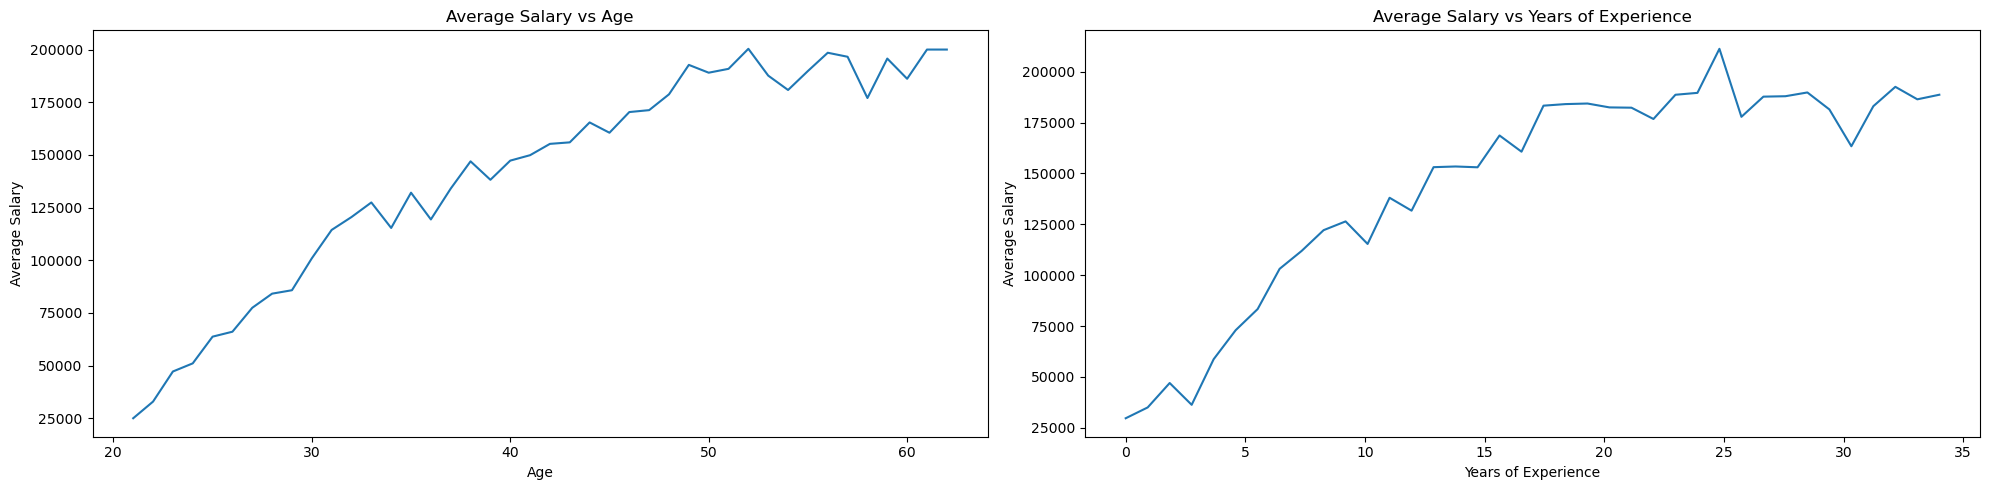

In [11]:
fig, axes = plt.subplots(ncols=len(numerical_vars), nrows=1, figsize=(len(numerical_vars) * 10,5))

for ax, var in zip(axes, numerical_vars):
    ax.plot(np.linspace(min(salary_data[var]), max(salary_data[var]), len(set(salary_data[var]))), 
            salary_data.Salary.groupby(salary_data[var]).mean())
    # Adding title and labels
    ax.set_title('Average Salary vs ' + var)
    ax.set_xlabel(var)
    ax.set_ylabel('Average Salary')

plt.tight_layout()
plt.show()

The relationship between the salary and the categorical variables is shown below in a bar chart. On top of each bar, the percentage of observations belonging to each category is displayed.

In [12]:
categorical_vars = ["Gender","Education Level"]

In [13]:
def plot_categorical_var(ls_vars):
    fig, axes = plt.subplots(nrows=len(categorical_vars), ncols=1, figsize=(20, len(categorical_vars) * 5))

    for ax, var in zip(axes, categorical_vars):
        # Calculating average salary by categorical variable
        average_salary = salary_data.groupby(var)['Salary'].mean()

        # Calculate the percentage of observations per category
        counts = salary_data[var].value_counts(normalize=True) * 100

        # Create the bar plot
        sns.barplot(x=average_salary.index, y=average_salary.values, ax=ax)

        # Adding percentages in the middle of the bars
        for i, (avg_salary, cat) in enumerate(zip(average_salary.values, average_salary.index)):
            percentage = counts[cat]
            ax.text(i, avg_salary + 2000, f'{percentage:.2f}%', ha='center', fontsize=12, color='black')

        # Add titles and labels
        ax.set_title('Average Salary and Percentage of Observations by ' + var, fontsize=16)
        ax.set_xlabel(var, fontsize=14)
        ax.set_ylabel('Average Salary', fontsize=14)

    plt.tight_layout()
    plt.show()

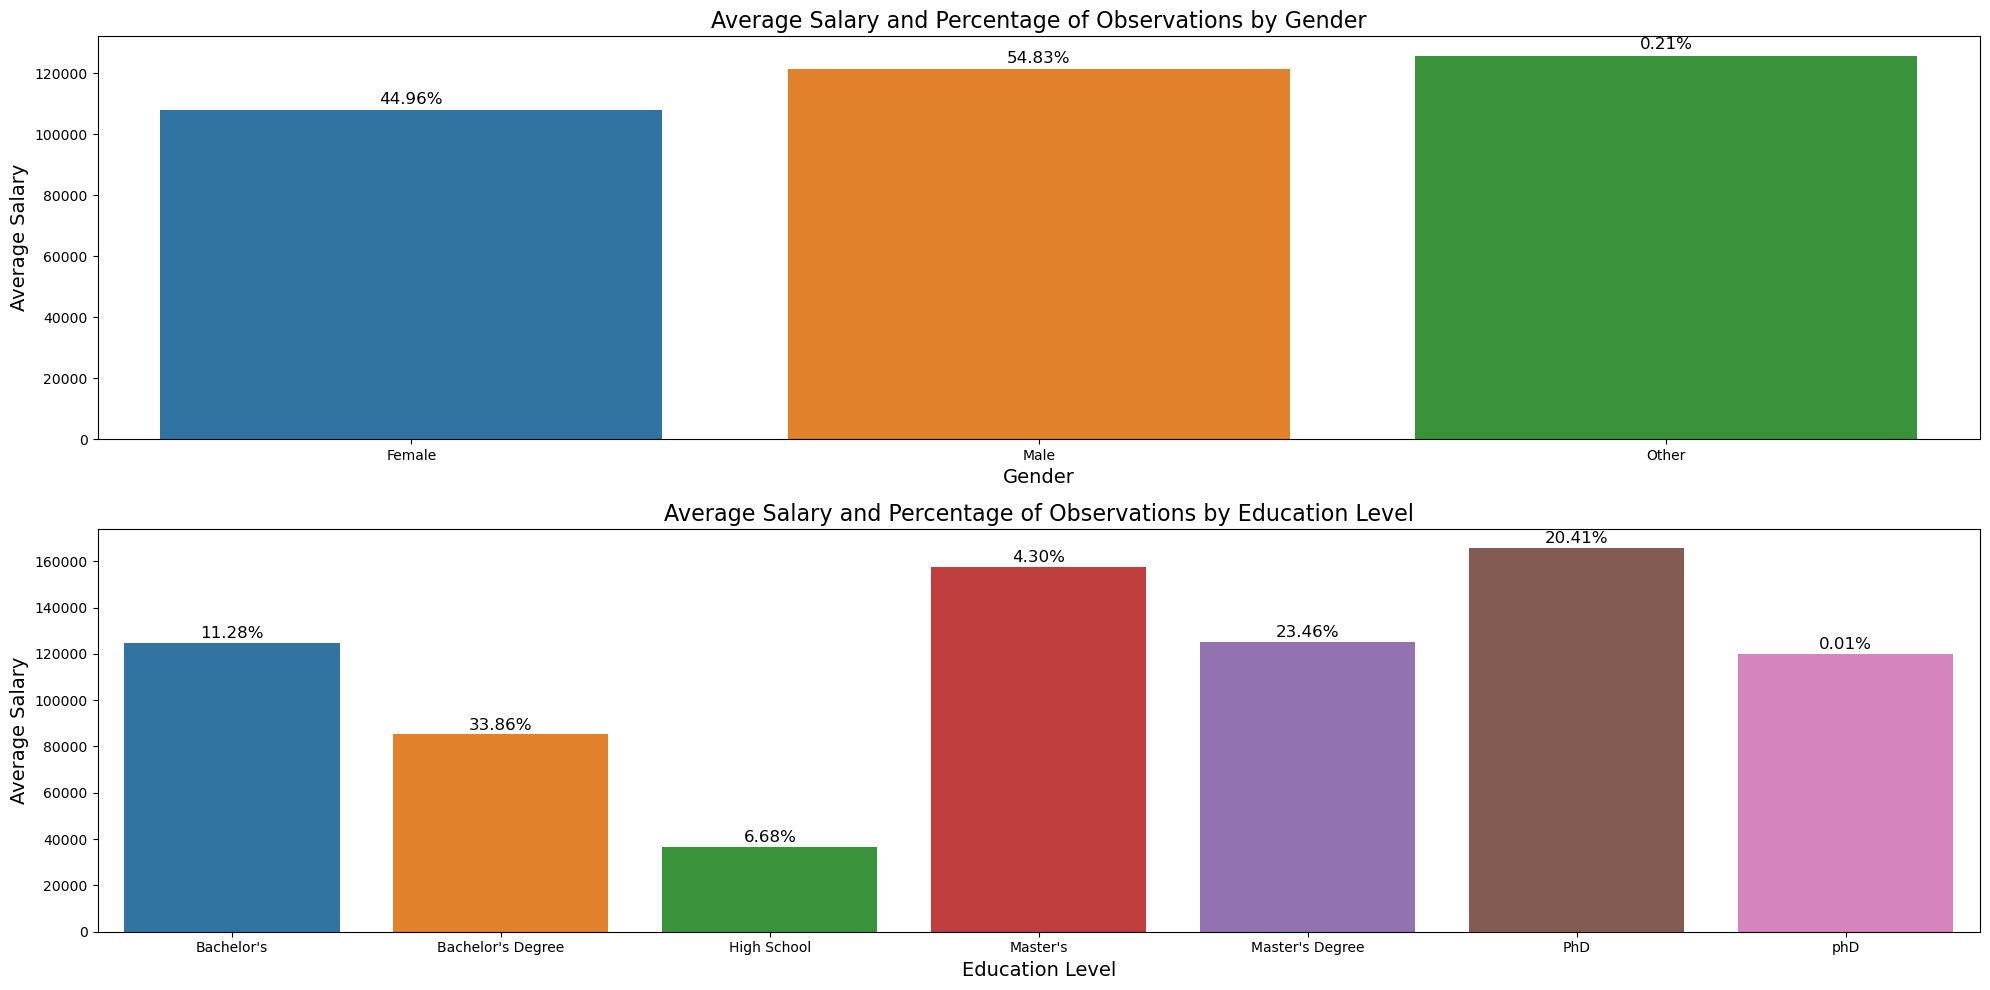

In [14]:
plot_categorical_var(categorical_vars)

Due to the fact that the Other group in Gender is that small we can decide to leave it out. 

In [15]:
salary_data = salary_data.query("Gender != 'Other'").copy()

We observe that several Education levels have different way of writing. So lets fix that too.

In [16]:
education_level_dict = {"High School": "High School",
                        "Bachelor\'s": "Bachelor",
                        "Bachelor\'s Degree": "Bachelor",
                        "Master\'s": "Master",
                        "Master\'s Degree": "Master",
                        "PhD": "PhD",
                        "phD": "PhD"}

In [17]:
salary_data["Education Level"] = salary_data["Education Level"].map(education_level_dict)

In [18]:
salary_data[['Gender','Education Level']].describe(include = 'all')

Gender Education Level
count    6690            6690
unique      2               4
top      Male        Bachelor
freq     3676            3026

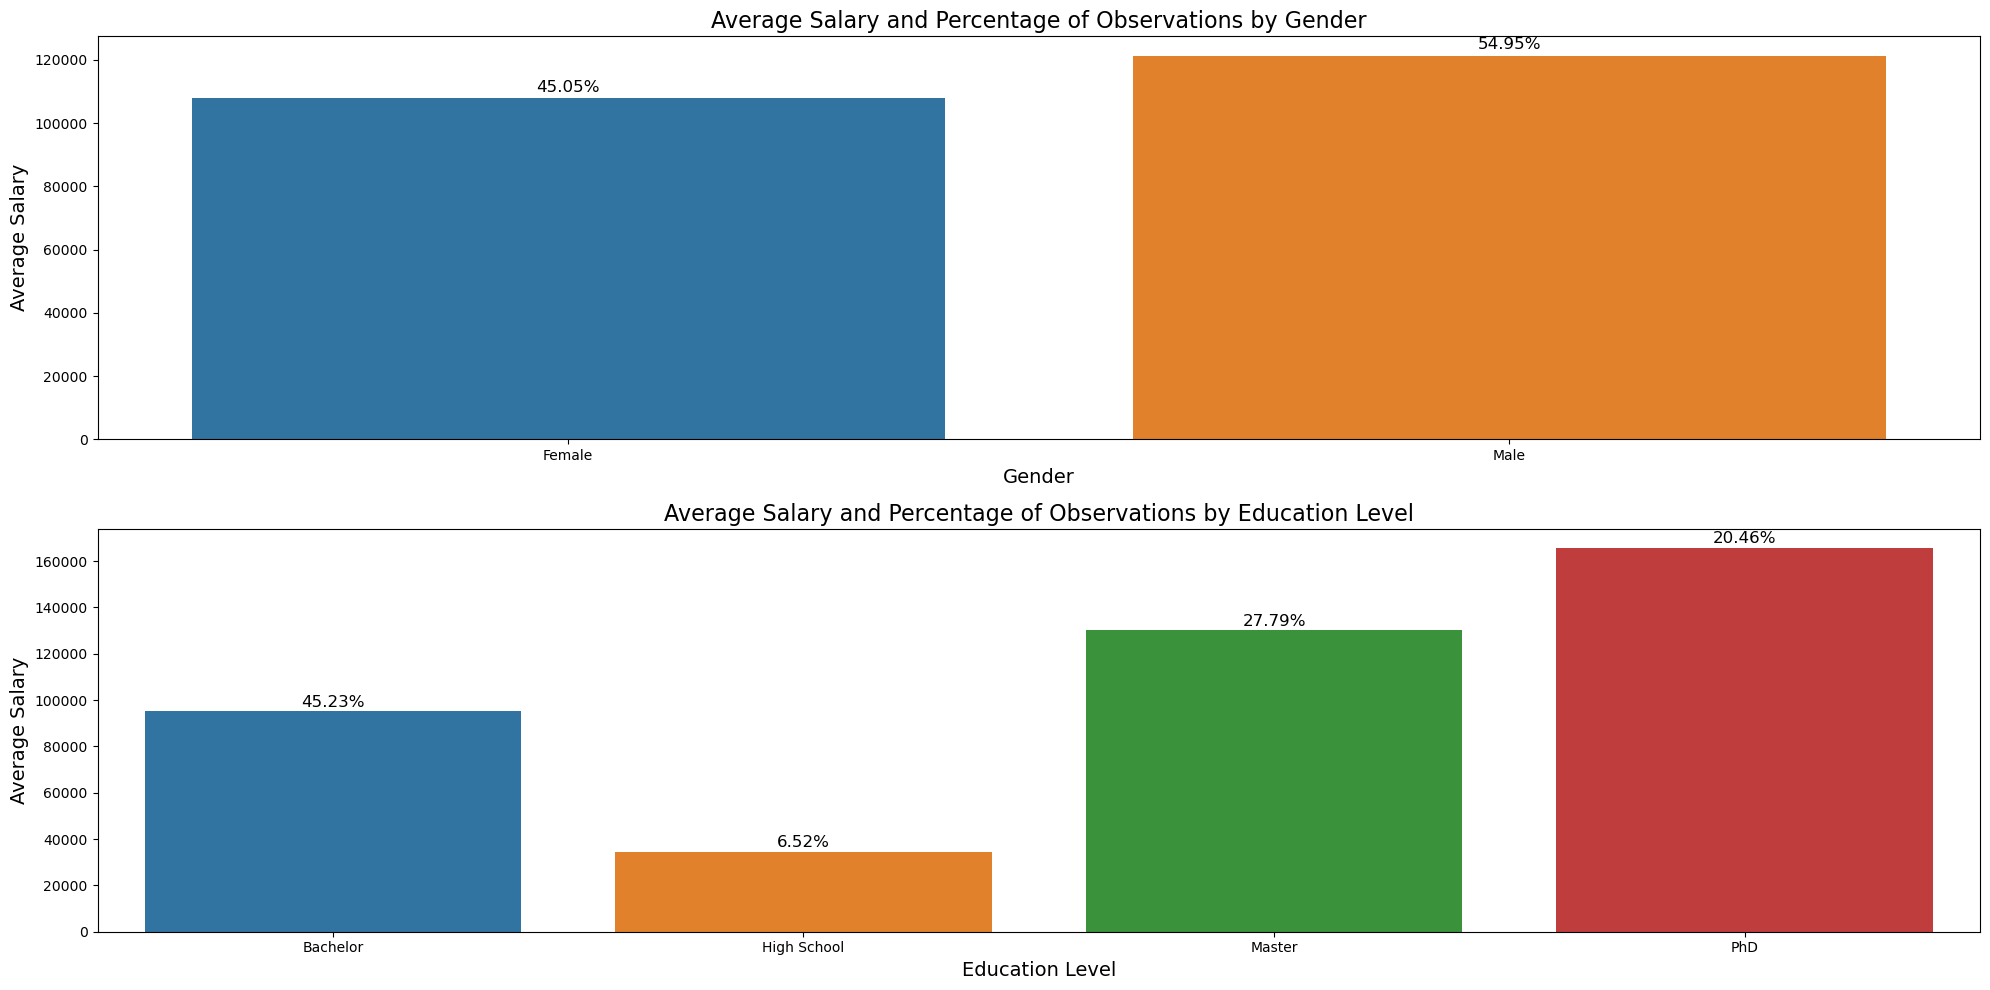

In [19]:
plot_categorical_var(categorical_vars)

# 4. Regression Tree <a name="Regression_Tree"></a>

As previously mentionned, there are two types of decision trees: regression trees and classification trees. In this section, the dependent variable Salary is continuous. A regression tree is therefore applied. In Python, regression trees can be developed using function ```DecisionTreeRegressor```.
Documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). Given that the function can only deal with numeric explanatory variables, categorical variables are tranformed into numeric ones whenever possible. Function ```DecisionTreeRegressor``` allows the user to tune different parameters, which will be treated later on. For the moment, the option to limit the depth of the tree is set to 2 to plot a simple initial tree.

In [20]:
salary_data.loc[:,"Education Level"] = salary_data["Education Level"].map({"High School": 0, "Bachelor": 1, "Master": 2, "PhD": 3})
salary_data["Gender_n"] = salary_data["Gender"].map({"Male": 1, "Female": 0})

In [21]:
X = salary_data.drop(columns=["Salary", "Job Title", "Gender"])
print(X)
y = salary_data["Salary"]

       Age Education Level  Years of Experience  Gender_n
0     32.0               1                  5.0         1
1     28.0               2                  3.0         0
2     45.0               3                 15.0         1
3     36.0               1                  7.0         0
4     52.0               2                 20.0         1
...    ...             ...                  ...       ...
6699  49.0               3                 20.0         0
6700  32.0               0                  3.0         1
6701  30.0               1                  4.0         0
6702  46.0               2                 14.0         1
6703  26.0               0                  1.0         0

[6690 rows x 4 columns]


In [22]:
clf = DecisionTreeRegressor(max_depth=3).fit(X, y)

The tree developed below is plotted using ```plot_tree``` ([source](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)).

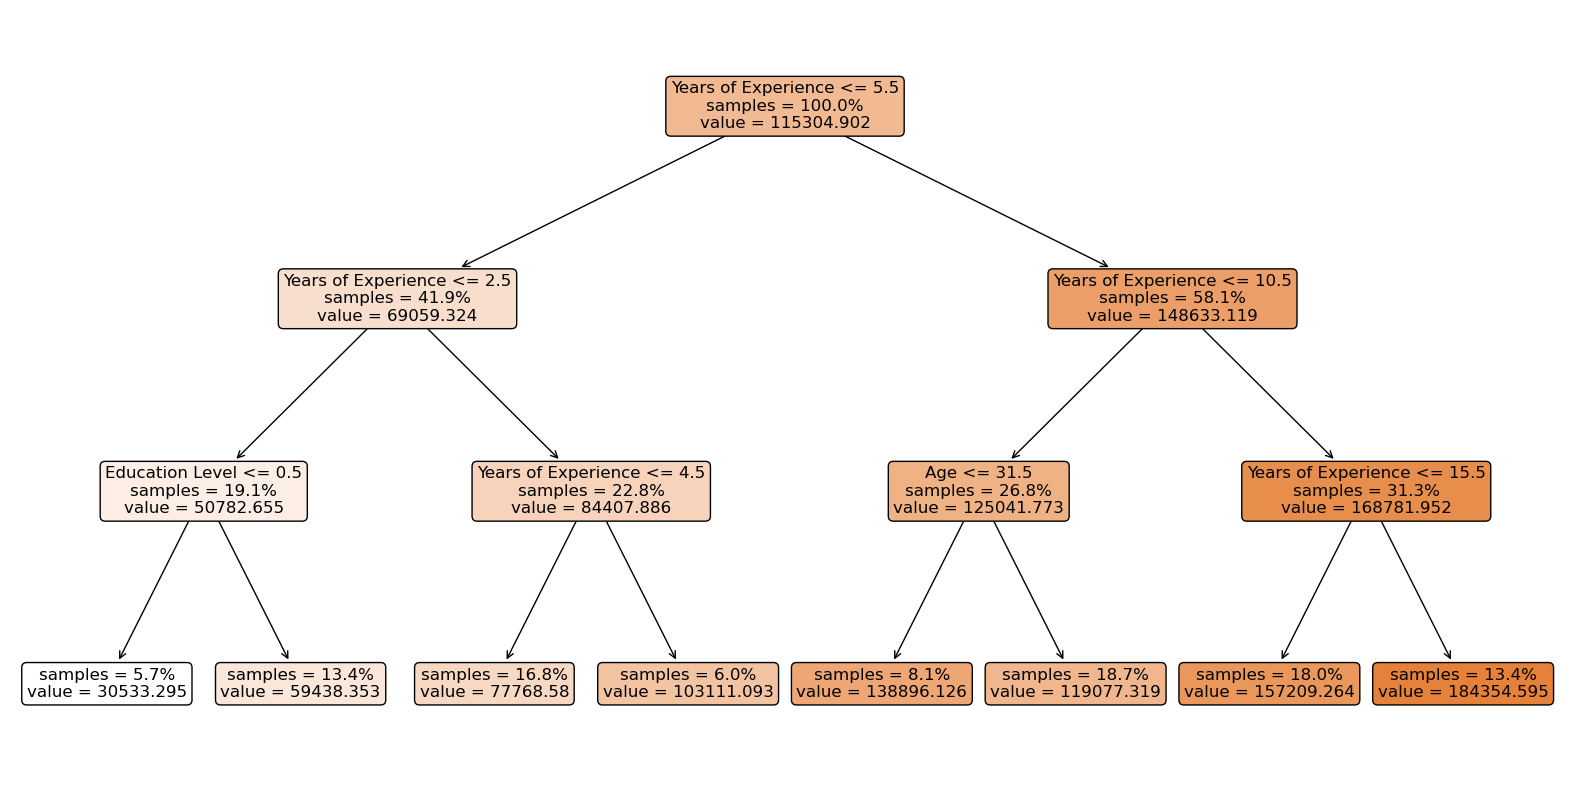

In [23]:
# Visualisation of the tree
plt.figure(figsize=(20,10))
a = plot_tree(clf,
              feature_names=list(X.columns),
              impurity = False,
              proportion = True,
              filled=True,
              rounded=True,
              fontsize=12)
plt.show()

## Split criteria

As seen in the theoretical session, the algorithm selects the split that results in the lowest loss function values in the child nodes. ```DecisionTreeRegressor``` allows the user to choose between the following types of loss function, in line to what is explained in section [2.2.1](#overview_regression_tree).

*   ```squared_error```: Mean Squared Error
*   ```friedman_mse```: Friedman Mean Squared Error
*   ```absolute_error```: Mean-absolute error
*   ```poisson```: Half Mean Poisson Deviance

When the user does not specify the criterion, the Mean Squared Error is used by default.

In the tree developed above, the explanatory variable used by the algorithm to perform a split is *Years of Experience*. In the third section of this notebook, the relationship between these two variables was studied through a graph and the connection was clear. The first split of the tree divides observations where the Years of experience are less or equal than 5.5 and observations where this variable presents greater values. This implies that 5.5 is the value that minimizes the MSE in the child nodes. The code below confirms this.

On the basis of the chosen split criterion, the way the split is performed changes. The code below aims to give an example of this. When the Poisson criterion is chosen, the first split is also based on the variable Years of experience, but choosing a value of 4.5 instead of 5.5.

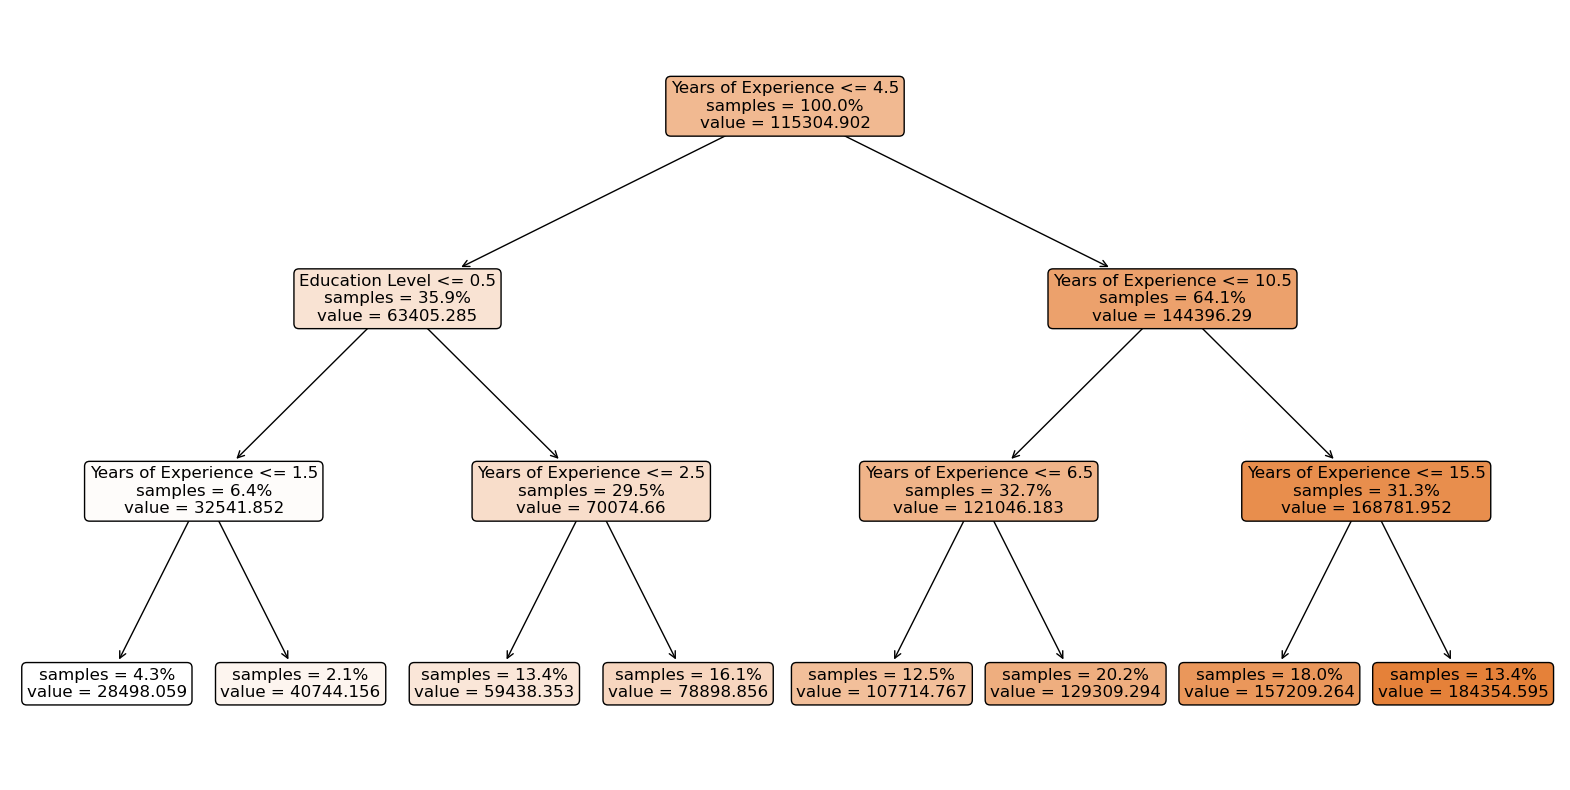

In [24]:
clf_p = DecisionTreeRegressor(max_depth=3, criterion='poisson').fit(X, y)

# Visualisation of the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
a = plot_tree(clf_p,
              feature_names=list(X.columns),
              #class_names=salary_data.target_names,
              impurity = False,
              proportion = True,
              filled=True,
              rounded=True,
              fontsize=12)
plt.show()

## Stopping criteria

To avoid encountering overfitting issues, ```DecisionTreeRegressor``` includes the possibility to choose between the following stopping criteria:


*   ```max_depth```: the maximum depth of the tree can be specified by the user
*   ```min_samples_split```: the user can set the minimum number of samples required to split an internal node
*   ```max_leaf_nodes```: the user can set the maximum number of leaf nodes
*   ```min_impurity_decrease```: a node will only be split if this leads to a decrease of the impurity measure greater or equal to the threshold set by the user
*   ```ccp_alpha```: the complexity parameter used when pruning with the cost-complexity function (see below for further explanation).


**Minimum number of observations in a node**

Instead of determining the depth of a tree, the user can set the minimum number of observations that must be contained in a node when performing a split. This helps to prevent overfitting. Below, this option is implemented.

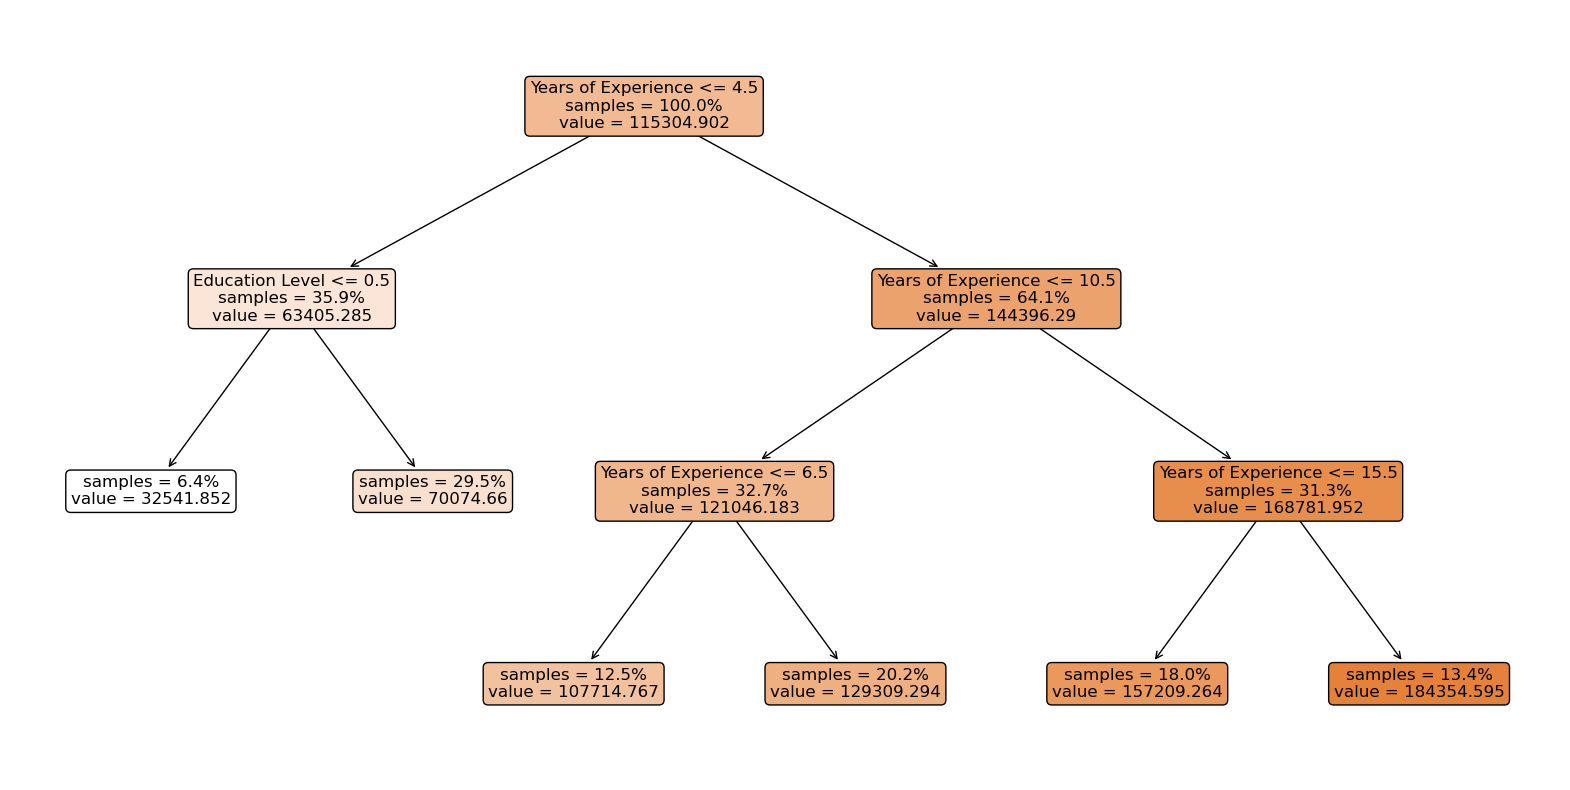

In [25]:
clf_mb = DecisionTreeRegressor(min_samples_split = 2000,max_depth=3, criterion='poisson').fit(X, y)

# Visualisation of the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
a = plot_tree(clf_mb,
              feature_names=list(X.columns),
              #class_names=salary_data.target_names,
              impurity = False,
              proportion = True,
              filled=True,
              rounded=True,
              fontsize=12)
plt.show()

## Pruning for regression trees

As seen in section [2.3](#stopping_criteria), pruning is another way to prevent overfitting. The idea of pruning is based on the cost-complexity function:

$$ R_{\alpha}(T) = R(T) + \alpha |T| $$

In Python, the function  ```DecisionTreeRegressor``` allows the user to set a certain value for $\alpha$. Below, the sum of the impurity of leaves is plotted against different values of $\alpha$. To do so, ```cost_complexity_pruning_path``` is used to find values of effective alphas and values of the sum of impurities of the leaves of the tree.

In the following plot, the maximum effective alpha value is removed, because it is the trivial tree with only one node.

In [26]:
# Computing a tree with no max_depth
clf = DecisionTreeRegressor().fit(X, y)

# Finding the values of leaves' impurities and effective alphas
path = clf.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

For demo purposes we remove a big chuck of the last alphas to better show the graphs.

In [27]:
len(ccp_alphas)

603

In [28]:
ccp_alphas = ccp_alphas[0:150]
impurities = impurities[0:150]

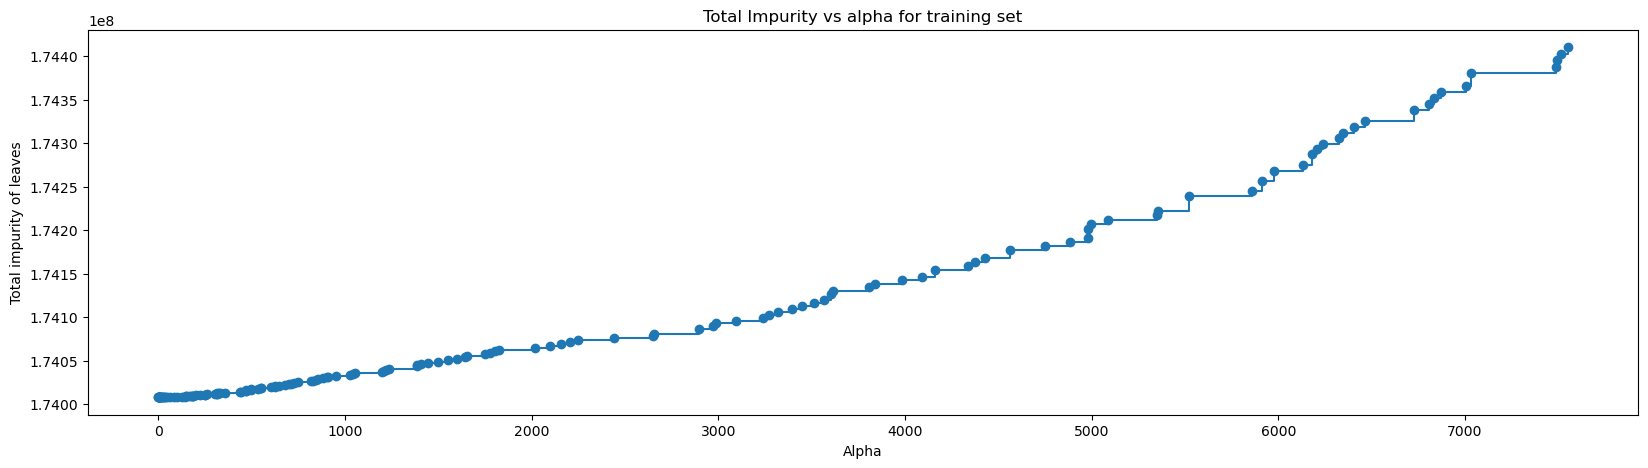

In [29]:
# Plotting
plt.figure(figsize=(20,5))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Total impurity of leaves")
plt.title("Total Impurity vs alpha for training set")
plt.show()

As seen above, the complexity parameter $\alpha$ is one of the inputs that can be passed into the ```DecisionTreeRegressor``` function. Below, the number of nodes for each value of $\alpha$ is computed. When $\alpha = 0$, the number of terminal nodes is at its highest as there is no penalty when adding new leaves.

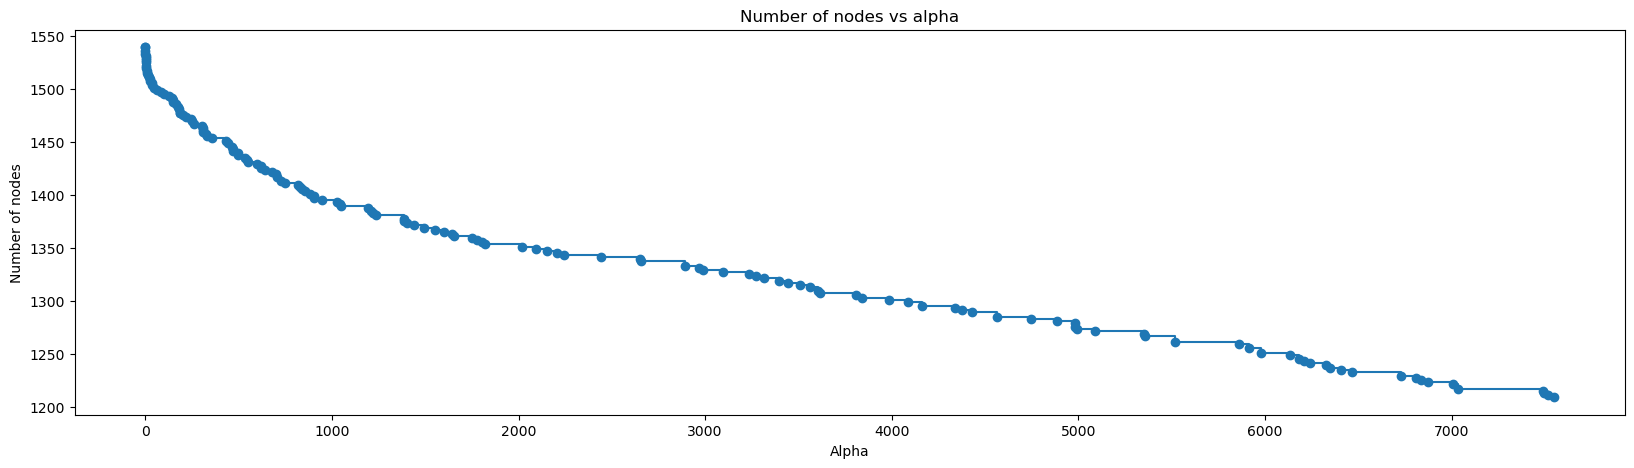

In [30]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    clf.fit(X, y)
    clfs.append(clf)

number_nodes = [clf.tree_.node_count for clf in clfs]

plt.figure(figsize=(20,5))
plt.plot(ccp_alphas, number_nodes,marker="o", drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Number of nodes")
plt.title("Number of nodes vs alpha")
plt.show()

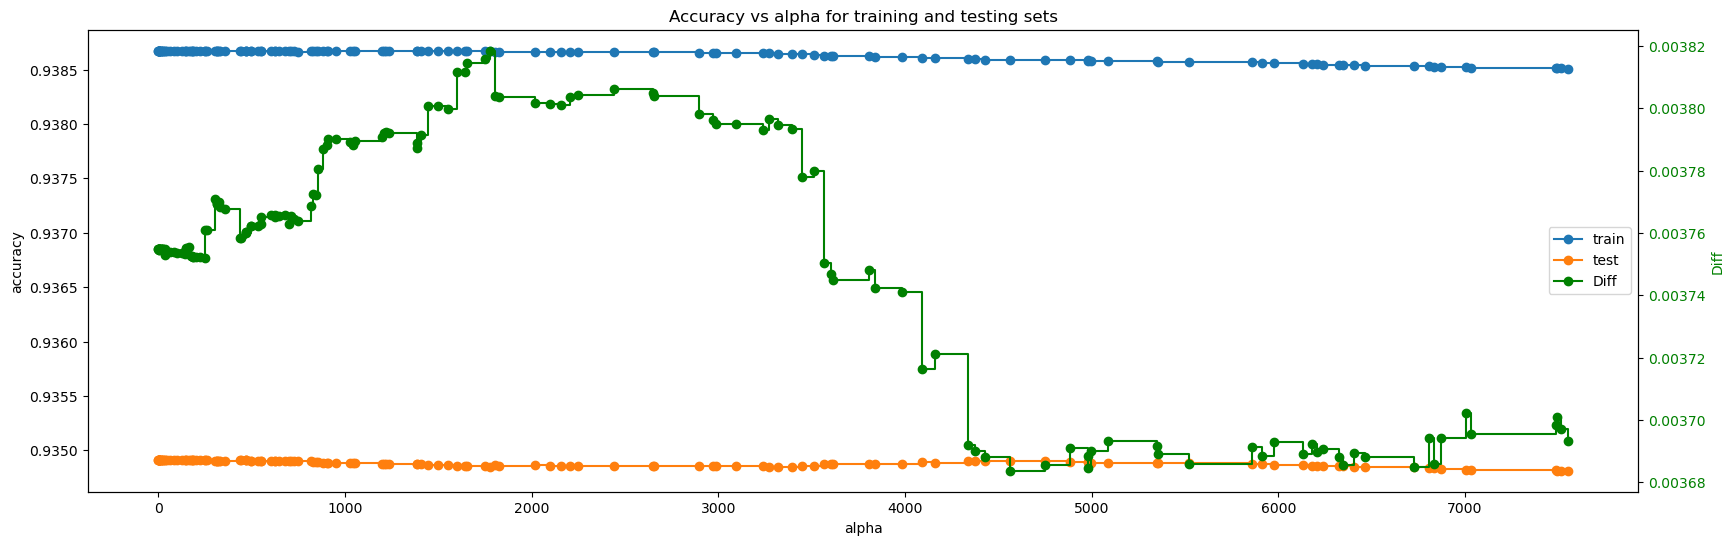

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

diff =[a - b for a, b in zip(train_scores, test_scores)]

fig, ax1 = plt.subplots(figsize=(20, 6))
ax1.set_xlabel("alpha")
ax1.set_ylabel("accuracy")
ax1.set_title("Accuracy vs alpha for training and testing sets")
ax1.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax1.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")

# Initialize the secondary y-axis
ax2 = ax1.twinx()

# Plot Diff on the secondary y-axis
ax2.plot(ccp_alphas, diff, marker="o", label="Diff", drawstyle="steps-post", color='g')
ax2.set_ylabel("Diff", color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')

plt.show()

In [32]:
print(f'Best alpha based on test score: {ccp_alphas[np.argmax(test_scores)]}')
print(f'Accuracy for train set: {train_scores[np.argmax(test_scores)]*100:.2f}%')
print(f'Accuracy for test set: {test_scores[np.argmax(test_scores)]*100:.2f}%')
print(f'Number of nodes: {number_nodes[np.argmax(test_scores)]}')

Best alpha based on test score: 37.36920777280466
Accuracy for train set: 93.87%
Accuracy for test set: 93.49%
Number of nodes: 1503


In [33]:
print(f'Best alpha based on difference: {ccp_alphas[np.argmin(diff)]}')
print(f'Accuracy for train set: {train_scores[np.argmin(diff)]*100:.2f}%')
print(f'Accuracy for test set: {test_scores[np.argmin(diff)]*100:.2f}%')
print(f'Number of nodes: {number_nodes[np.argmin(diff)]}')

Best alpha based on difference: 4564.755773540321
Accuracy for train set: 93.86%
Accuracy for test set: 93.49%
Number of nodes: 1285


In [34]:
print(f'Best alpha based on number of nodes: {ccp_alphas[np.argmin(number_nodes)]}')
print(f'Accuracy for train set: {train_scores[np.argmin(number_nodes)]*100:.2f}%')
print(f'Accuracy for test set: {test_scores[np.argmin(number_nodes)]*100:.2f}%')
print(f'Number of nodes: {number_nodes[np.argmin(number_nodes)]}')

Best alpha based on number of nodes: 7549.334903594801
Accuracy for train set: 93.85%
Accuracy for test set: 93.48%
Number of nodes: 1209


# 5. Classification Tree <a name="Classification_Tree"></a>

When the target variable is categorical and takes discrete values, classification trees are used to divide data. In Python, this can be implemented using function ```DecisionTreeClassifier```. Additional information is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Below, a tree that classifies observations on the basis of the variable Gender of the dataset on salary is developed.

In [35]:
Xc = salary_data.drop(columns=["Gender", "Job Title", "Gender_n"])
yc = salary_data["Gender"]

In [36]:
clfc = DecisionTreeClassifier(max_depth=3).fit(Xc, yc)

In [37]:
# Plot of the tree
y_class_names = salary_data["Gender"].unique()

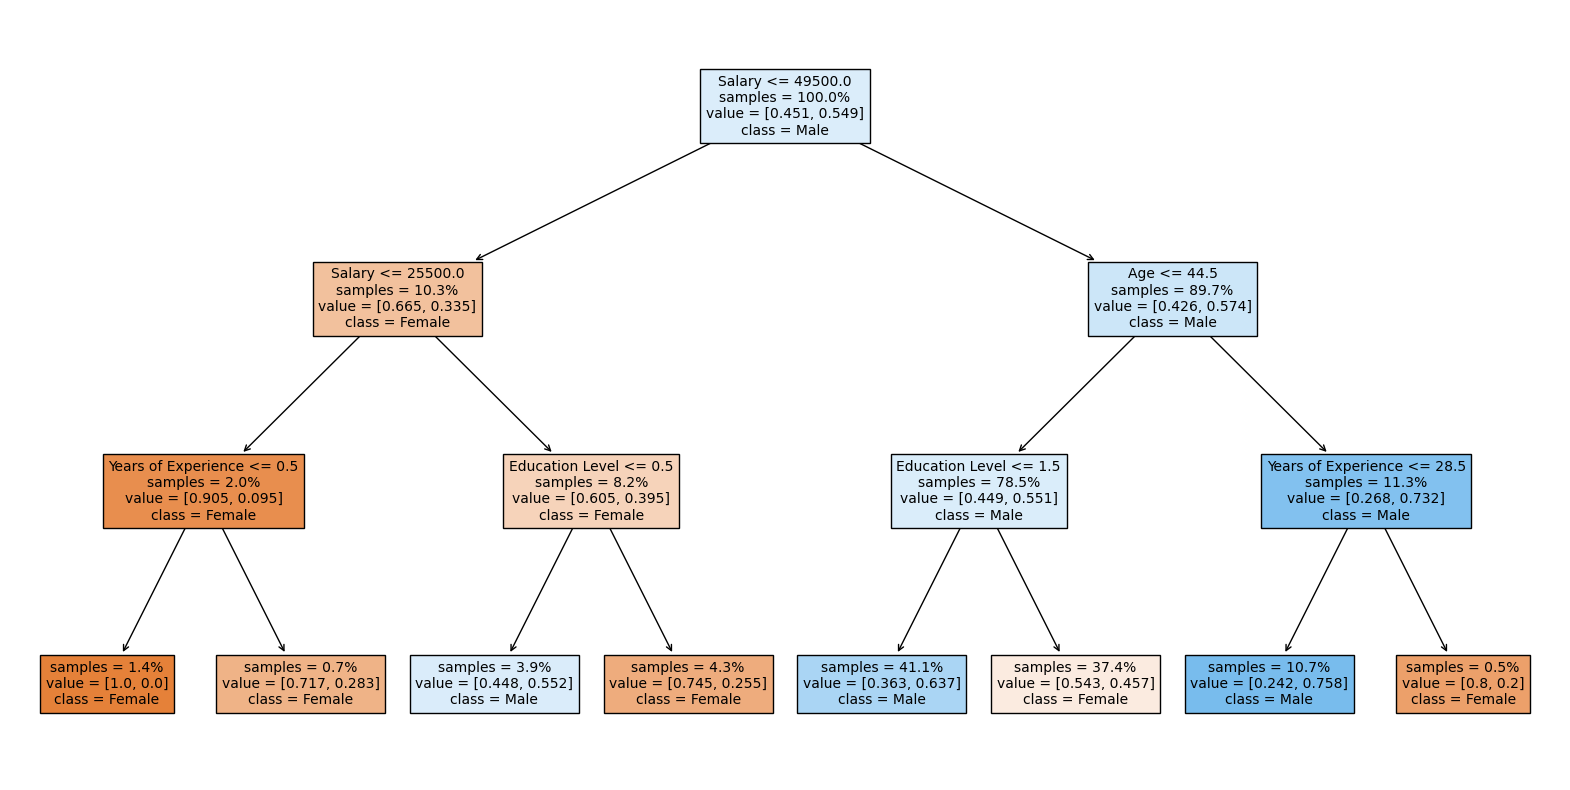

In [38]:
fig = plt.figure(figsize=(20,10))
plot_tree(clfc,
              feature_names=list(Xc.columns),
              class_names=list(clfc.classes_),
              impurity = False,
              proportion = True,
              filled=True,
              rounded=False,
              fontsize=10)
plt.show()

## Split criteria

As  introduced in section [2.2.2](#overview_classification_tree), to determine the best way to perform a split within a certain node, an heterogeneity measure is used. ```DecisionTreeClassifier``` allows the user to choose between one of the following measures:

*   Gini index
*   Entropy

These indexes represent impurity measures. The best feature split for a certain node is the one that leads to minimize the chosen index.

When the user does not specify the criterion, the Gini index is used by default.

If we would change the criteria again the tree might change due to different splits

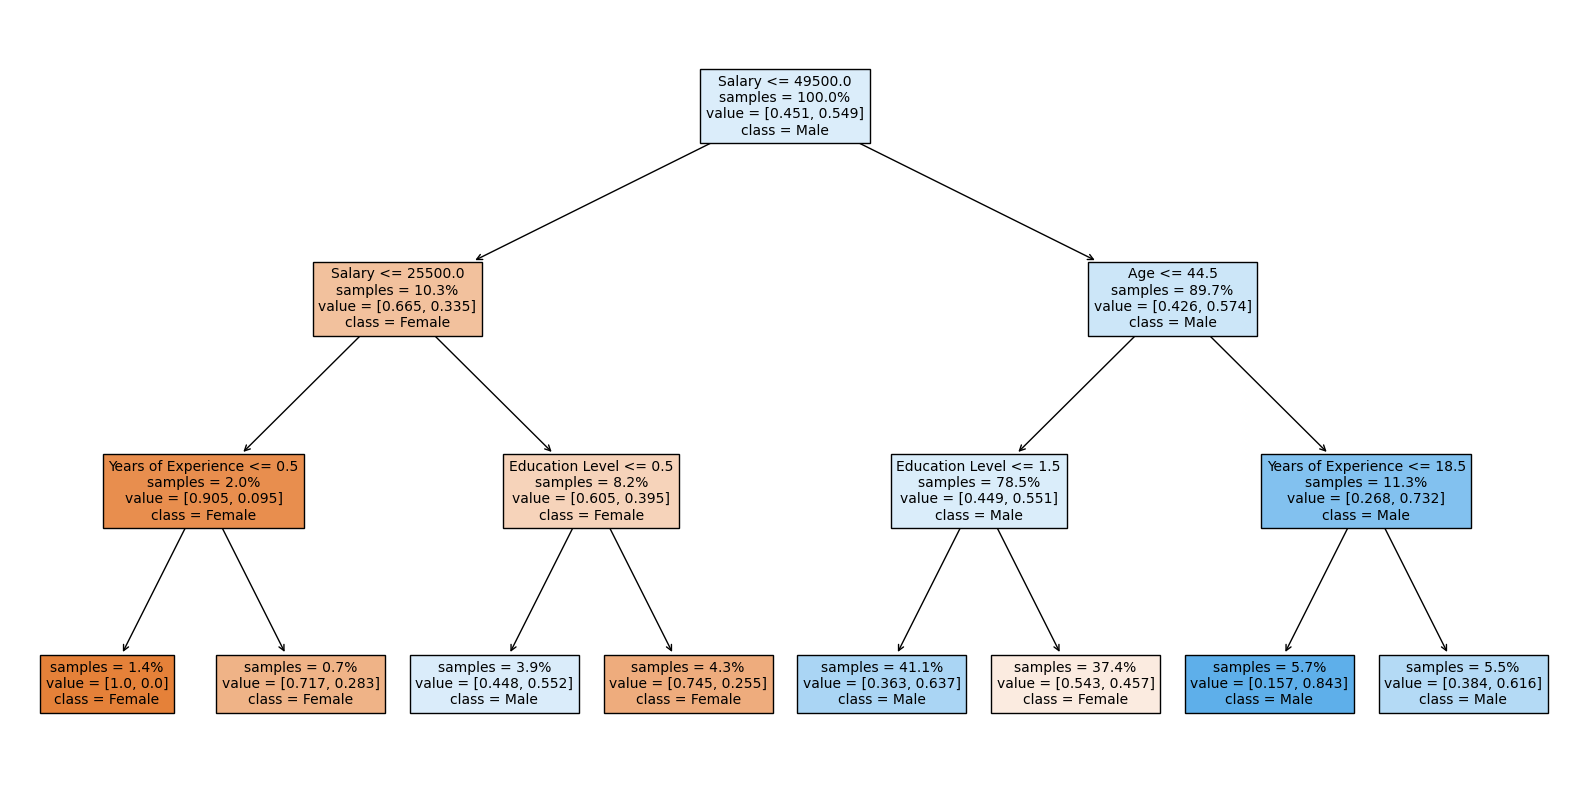

In [39]:
clfc = DecisionTreeClassifier(max_depth=3,criterion ='entropy').fit(Xc, yc)
fig = plt.figure(figsize=(20,10))
plot_tree(clfc,
              feature_names=list(Xc.columns),
              class_names=list(clfc.classes_),
              impurity = False,
              proportion = True,
              filled=True,
              rounded=False,
              fontsize=10)
plt.show()

**Evaluating the classification accuracy: test sample estimate of the correctly classified observations percentage**

One of the criteria used to select a classification tree is its capacity to correctly classify an observation. Given two simlar trees, *i.e.* with the same number of leaves, the one that presents the lower percentage of wrongly classified observations is preferable.
<br/> A reliable measure can be found by first splitting the observations into two groups. A regression tree is built using a training sample, while the percentage of correctly classified observations is calculated applying the regression tree on the test sample. In formula, this measure can be written as follows:

$$R(T) = \frac{1}{n_{test}} \sum_{i \in S_{test}}I[T(x_i) = C(x_i)]$$

where:


*   $n_{test}$ is the number of observations in the test dataset
*   $T(x_i)$ represents the category assigned to observation $x_i$ by the decision tree $T()$ found using the training dataset
*   $C(x_i)$ is the actual class to which observation $x_i$ belongs
*   $I[.]$ is an indicator that takes values 0 or 1

With Python, this can be found using the ```accuracy_score``` ([source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). As the maximum depth of the tree increases, more nodes are added to the tree. This leads to more splits in the data and therefore to a better accuracy (at least based on the training sample). Overfitting happens when more nodes lead the tree to become too complex, fit too closely the training data and fail to generalise when using new data.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(Xc, yc, test_size = 0.3, random_state = 12)

clfc.fit(X_train, y_train)
a = 3
clfc_1 = DecisionTreeClassifier(max_depth = a)
clfc_1.fit(X_train, y_train)
y_pred_1 = clfc_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)

b = 30
clfc_2 = DecisionTreeClassifier(max_depth = b)
clfc_2.fit(X_train, y_train)
y_pred_2 = clfc_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred_2)

print(f"Decision Tree Accuracy with max_depth={a}: {accuracy_1 * 100:.2f}%")
print(f"Decision Tree Accuracy with max_depth={b}: {accuracy_2 * 100:.2f}%")

Decision Tree Accuracy with max_depth=3: 62.68%
Decision Tree Accuracy with max_depth=30: 87.14%


## Pruning for classification trees

The size of the tree can be limited using a pruning algorithm. Similarly to what is done with regression trees, pruning can be applied to classification trees using a cost-complexity function.
A cost-complexity parameter $\alpha$ is used to control the trade-off between tree complexity and accuracy. By plotting the accuracy against different values of $\alpha$, it is possible to select the optimal level of pruning to achieve the best generalization performance.

In [41]:
clfc = DecisionTreeClassifier().fit(Xc, yc)
pathc = clfc.cost_complexity_pruning_path(Xc, yc)
ccp_alphas, impurities = pathc.ccp_alphas, pathc.impurities

In [42]:
len(ccp_alphas)

425

In [43]:
ccp_alphas = ccp_alphas[:25]
impurities = impurities[:25]

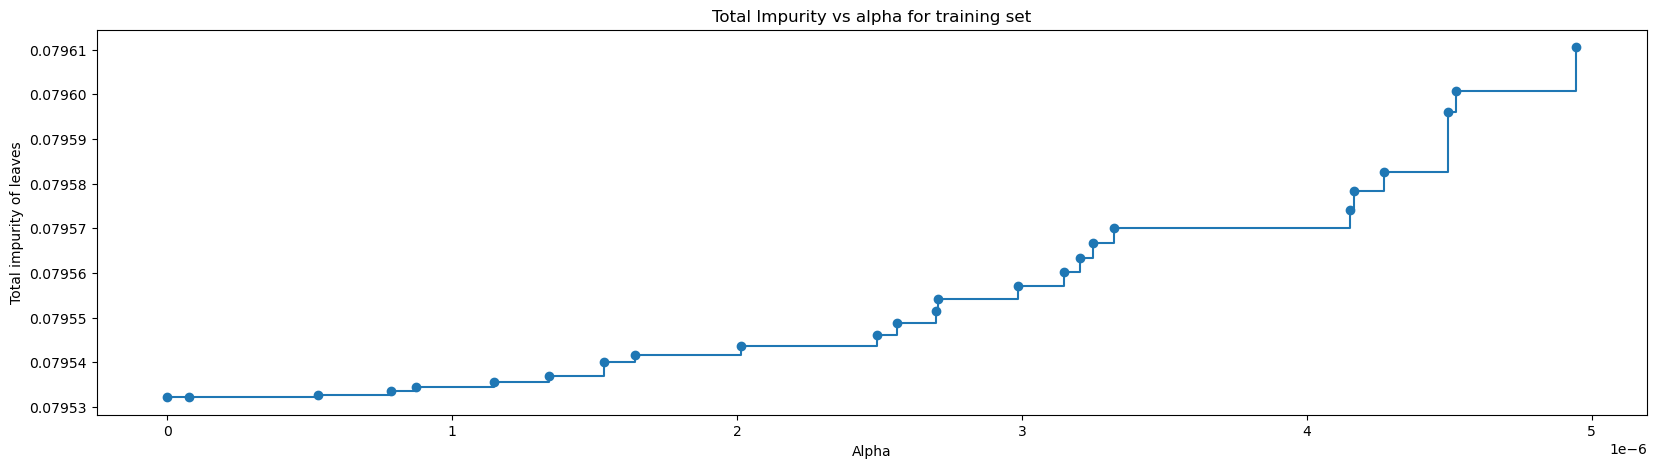

In [44]:
# Plotting
plt.figure(figsize=(20,5))
plt.plot(ccp_alphas, impurities, marker='o', drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Total impurity of leaves")
plt.title("Total Impurity vs alpha for training set")
plt.show()

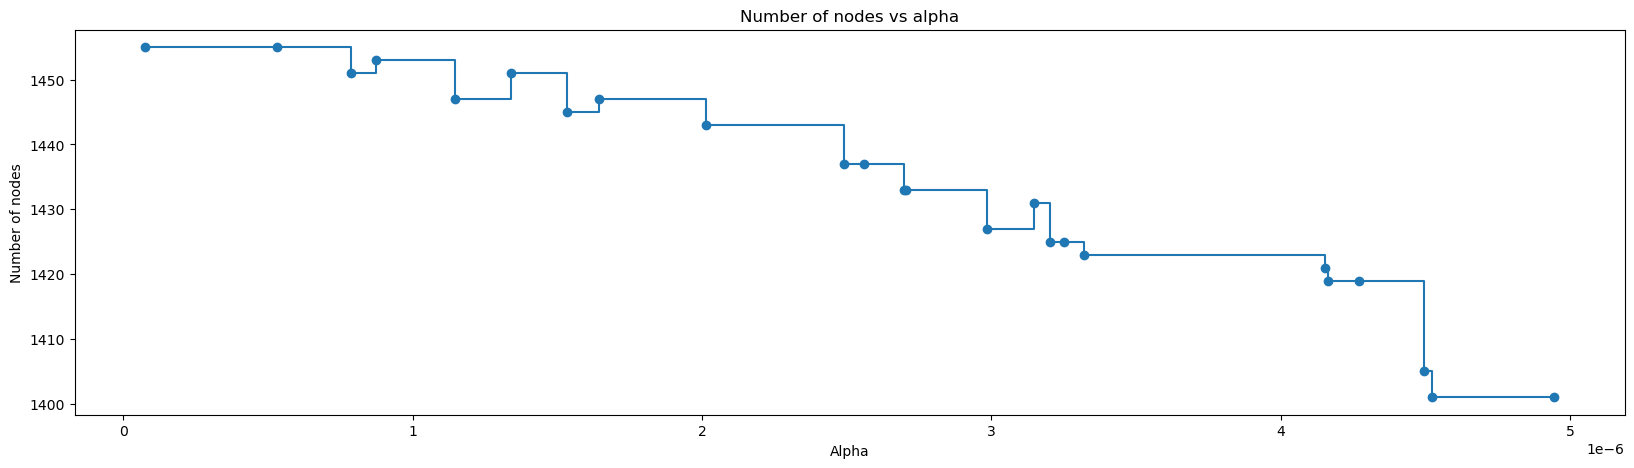

In [45]:
clfc = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(Xc, yc)
    clfc.append(clf)

clfc = clfc[1:]

number_nodes = [clf.tree_.node_count for clf in clfc]

plt.figure(figsize=(20,5))
plt.plot(ccp_alphas[1:], number_nodes,marker="o", drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Number of nodes")
plt.title("Number of nodes vs alpha")
plt.show()

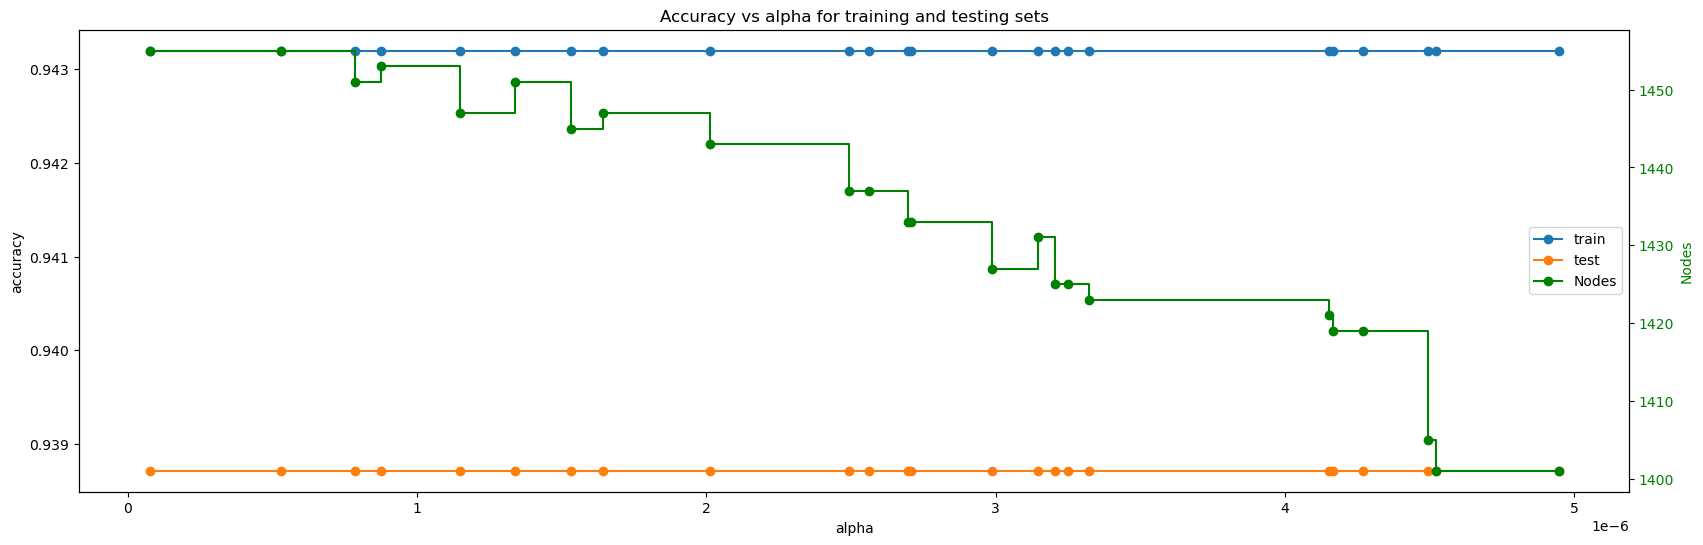

In [46]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size = 0.3, random_state = 12)

trainc_scores = [clf.score(Xc_train, yc_train) for clf in clfc]
testc_scores = [clf.score(Xc_test, yc_test) for clf in clfc]

diffc =[a - b for a, b in zip(trainc_scores, testc_scores)]

fig, ax1 = plt.subplots(figsize=(20, 6))
ax1.set_xlabel("alpha")
ax1.set_ylabel("accuracy")
ax1.set_title("Accuracy vs alpha for training and testing sets")
ax1.plot(ccp_alphas[1:], trainc_scores, marker="o", label="train", drawstyle="steps-post")
ax1.plot(ccp_alphas[1:], testc_scores, marker="o", label="test", drawstyle="steps-post")

# Initialize the secondary y-axis
ax2 = ax1.twinx()

# Plot Diff on the secondary y-axis
ax2.plot(ccp_alphas[1:], number_nodes, marker="o", label="Nodes", drawstyle="steps-post", color='g')
ax2.set_ylabel("Nodes", color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')

plt.show()

In [47]:
print(f'Best alpha: {ccp_alphas[1:][np.argmax(testc_scores)]}')
print(f'Accuracy for train set: {trainc_scores[np.argmax(testc_scores)]*100:.2f}%')
print(f'Accuracy for test set: {testc_scores[np.argmax(testc_scores)]*100:.2f}%')
print(f'Number of nodes: {number_nodes[np.argmin(diffc)]}')

Best alpha: 7.515175017177005e-08
Accuracy for train set: 94.32%
Accuracy for test set: 93.87%
Number of nodes: 1455


In [48]:
print(f'Best alpha based on difference: {ccp_alphas[1:][np.argmin(diffc)]}')
print(f'Accuracy for train set: {trainc_scores[np.argmin(diffc)]*100:.2f}%')
print(f'Accuracy for test set: {testc_scores[np.argmin(diffc)]*100:.2f}%')
print(f'Number of nodes: {number_nodes[np.argmin(diffc)]}')

Best alpha based on difference: 7.515175017177005e-08
Accuracy for train set: 94.32%
Accuracy for test set: 93.87%
Number of nodes: 1455


In [49]:
print(f'Best alpha based on number of nodes: {ccp_alphas[1:][np.argmin(number_nodes)]}')
print(f'Accuracy for train set: {trainc_scores[np.argmin(number_nodes)]*100:.2f}%')
print(f'Accuracy for test set: {testc_scores[np.argmin(number_nodes)]*100:.2f}%')
print(f'Number of nodes: {number_nodes[np.argmin(number_nodes)]}')

Best alpha based on number of nodes: 4.52198816746442e-06
Accuracy for train set: 94.32%
Accuracy for test set: 93.87%
Number of nodes: 1401


# 6 GridSearchCV <a name="GridSearchCV"></a>

The ```GridSearchCV``` function from ```scikit-learn``` enables the tuning of specific hyperparameters for a given model.([source](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)) It employs cross-validation to identify the optimal values for the parameters the user wishes to optimize. To use ```GridSearchCV```, the user must provide an ```estimator``` (the model to be optimized) and a ```parameter grid```—a dictionary specifying the hyperparameters and the range of values to be tested. 

It is important not to set the hyperparameter values within the estimator beforehand; instead, GridSearchCV systematically assigns different parameter combinations to the model during the search process. After completing the search, GridSearchCV returns ```best_params_```, which contains the parameter values that resulted in the best performance based on the chosen evaluation metric.

In [50]:
# Object to be estimated
clfc = DecisionTreeClassifier().fit(Xc, yc)
# Dictionary with parameters names and values to be tried
parameters = {'ccp_alpha': ccp_alphas}
clfc = GridSearchCV(DecisionTreeClassifier(), parameters).fit(Xc, yc)
# Best value for alpha
print (clfc.best_params_)

{'ccp_alpha': 2.985610905062268e-06}


# 7. Regression trees in an actuarial context: Number of claims <a name="Num_claims"></a>

The same dataset presented during Session 2 is now used again. This dataset, freMTPL2freq, has been previously imported in section [3](#Importing_and_cleaning_data) and contains data on 678,013 motor third-part liability policies in France. Its variables represent information on the number of claims (*ClaimNb*), the exposure, the charcactericstics of the vehicle and driver, as well as data on the geographical area. The variable of interest is the claims frequency, which is equal to the number of claims divided by the exposure. As this is a continous variable, a regression tree is developed to predict it on the basis of the other numeric variables of the dataset. The chosen criterion to split nodes is the Poisson one, which is based on the half mean Poisson deviance.

In [51]:
Xn = mtpl_freq.drop(columns=["ClaimNb", "IDpol", "Exposure", "Area", "VehBrand", "VehGas", "Region"])
yn = mtpl_freq["ClaimNb"]/mtpl_freq["Exposure"]

In [52]:
clfn = DecisionTreeRegressor(criterion='poisson', max_depth=3).fit(Xn, yn)

The tree is plotted below. This time, instead of using ```plot_tree```, package ```graphviz``` is employed ([source](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html)). This is another package used to create and vizualize graphs and network. It also allows the graph to be exported in different types of file (e.g. pnj, svg).

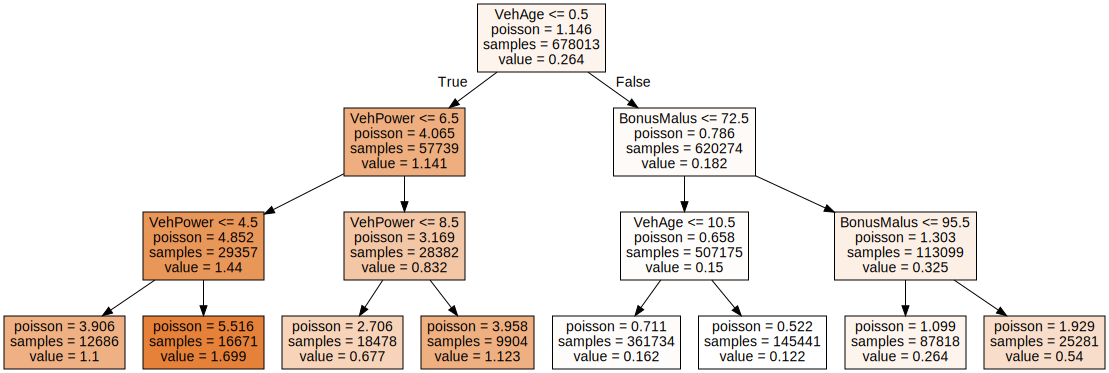

In [53]:
graph_file = export_graphviz(clfn, out_file = None, feature_names = Xn.columns, filled = True)
# Draw graph
graph = graphviz.Source(graph_file, format="png")
graph

Similarly to what has been previously done to find the value of $\alpha$ in the cost-complexity function that minimizes the relative error, the absolute error is plotted below against different maximum depth values.

In [54]:
pathn = clfn.cost_complexity_pruning_path(Xn, yn)
ccp_alphas, impurities = pathn.ccp_alphas, pathn.impurities

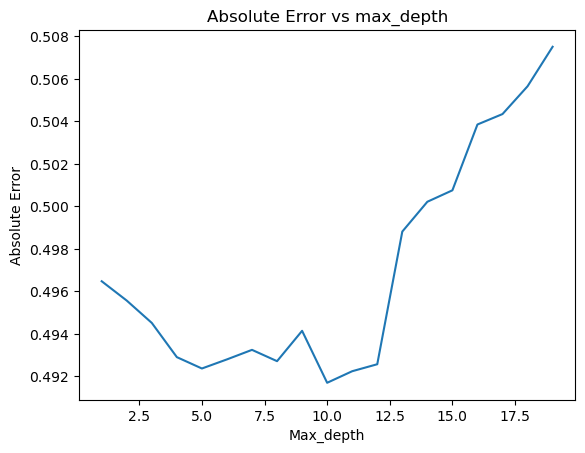

In [55]:
max_depths=np.arange(1,20)

X_train, X_test, y_train, y_test = train_test_split(Xn, yn, test_size = 0.3, random_state = 12)
clfn.fit(X_train, y_train)
abs_error_test = []
for max_depth in max_depths:
    clfn = DecisionTreeRegressor(max_depth=max_depth, criterion='poisson')
    clfn = clfn.fit(X_train, y_train)
    y_pred_test = clfn.predict(X_test)
    abs_error_test.append(statistics.mean(np.abs(y_pred_test-y_test)))

fig, ax = plt.subplots()
ax.plot(max_depths, abs_error_test)
ax.set_xlabel("Max_depth")
ax.set_ylabel("Absolute Error")
ax.set_title("Absolute Error vs max_depth")
plt.show()

First the model is underfitting. We can observe that the absolute error is relatively higher. The absolute error progressively then decreases until ```max_depth = 10```. Afterwards, the absolute error progressively increases due to overfitting. 

In [56]:
clfn = DecisionTreeRegressor(criterion='poisson', max_depth=10).fit(Xn, yn)
graph_file = export_graphviz(clfn, out_file = None, feature_names = Xn.columns, filled = True)
# Draw graph
graph = graphviz.Source(graph_file, format="png")
graph

# 8. Regression trees in an actuarial context: Severity of claims <a name="sev_claims"></a>

The dataset on severity of claims was imported in Section [3](#Importing_and_cleaning_data). It contains only two colums: *ClaimAmount* on the severity of claims and *IDpol*, a variable that allows to connect this dataset with the dataset on frequency claims. Below, the two datasets are merged. Observations corresponding to extreme values of *ClaimAmount* are discarded as they may alter predictions. A regression tree to predict the severity of claims is subsequently developed and plotted.

In [57]:
# Merging information from the dataset on frequency
mtpl_sev = pd.merge(mtpl_sev, mtpl_freq, on='IDpol')

In [58]:
mtpl_sev['ClaimAmount'].describe()

count    2.644400e+04
mean     2.265513e+03
std      2.937103e+04
min      1.000000e+00
25%      6.859925e+02
50%      1.172000e+03
75%      1.212385e+03
max      4.075401e+06
Name: ClaimAmount, dtype: float64

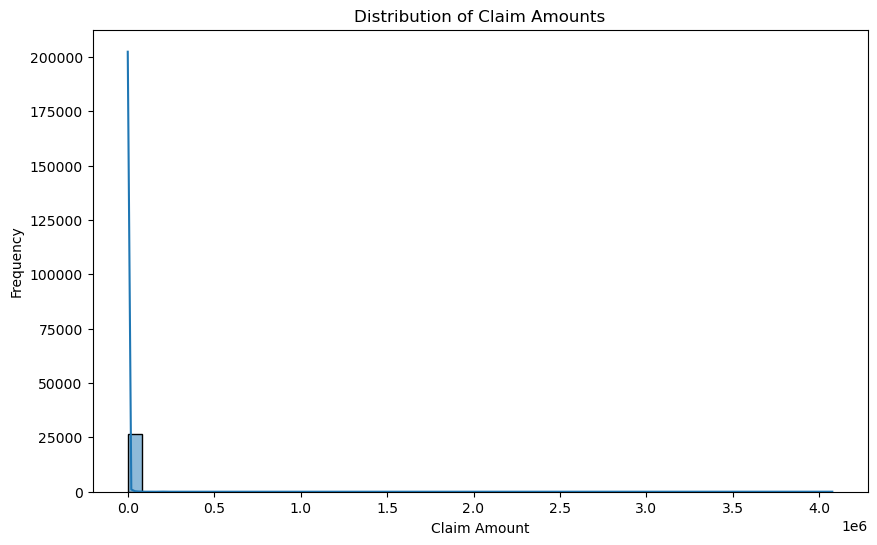

In [59]:
# Visualize the distribution
plt.figure(figsize=(10,6))
sns.histplot(mtpl_sev['ClaimAmount'], bins=50, kde=True)
plt.title('Distribution of Claim Amounts')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.show()

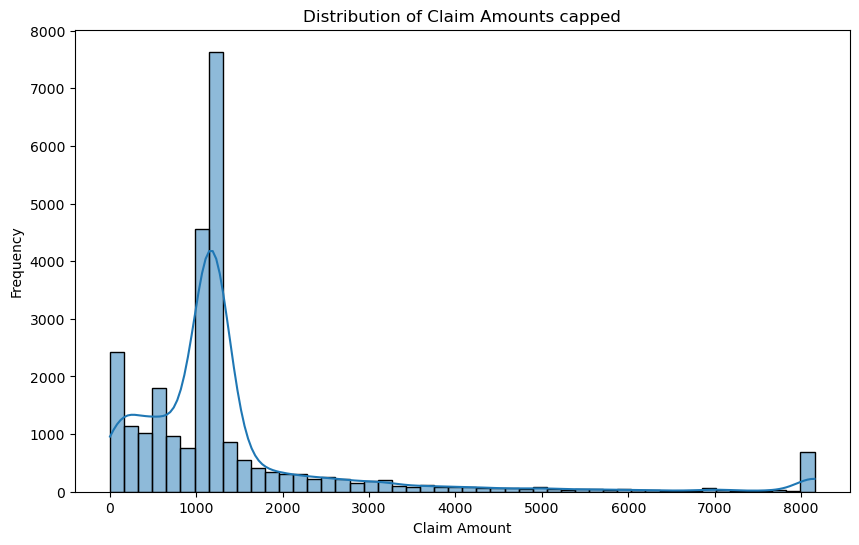

In [60]:
cap = mtpl_sev['ClaimAmount'].quantile(0.975)
mtpl_sev['claim_amount_capped'] = mtpl_sev['ClaimAmount'].clip(upper=cap)

plt.figure(figsize=(10,6))
sns.histplot(mtpl_sev['claim_amount_capped'], bins=50, kde=True)
plt.title('Distribution of Claim Amounts capped')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.show()

In [61]:
def equal_frequency_binning_with_labels(data, column, num_bins):
    """
    Bins a continuous column into equal-frequency bins with range-based labels.
    
    Parameters:
        data (pd.DataFrame): The DataFrame containing the data.
        column (str): The name of the column to bin.
        num_bins (int): The number of bins.
        
    Returns:
        pd.Series: A Series with range-based bin labels.
    """
    # Perform equal-frequency binning
    binned = pd.qcut(data[column], q=num_bins, duplicates='drop')
    
    # Extract bin edges
    bins = binned.cat.categories
    
    # Create range-based labels
    labels = [f"[{int(interval.left)} - {int(interval.right)}]" for interval in bins]
    
    # Assign labels
    binned_label = pd.qcut(data[column], q=num_bins, labels=labels, duplicates='drop')
    
    return binned_label

# Usage Example
mtpl_sev['claim_amount_binned_custom_label'] = equal_frequency_binning_with_labels(mtpl_sev, 'claim_amount_capped', 5)

# Verify
print(mtpl_sev[['claim_amount_capped', 'claim_amount_binned_custom_label']].head())

print(mtpl_sev['claim_amount_binned_custom_label'].value_counts())


   claim_amount_capped claim_amount_binned_custom_label
0               995.20                     [564 - 1128]
1              1845.74                    [1461 - 8156]
2              1128.12                     [564 - 1128]
3              1851.11                    [1461 - 8156]
4              1204.00                    [1128 - 1204]
claim_amount_binned_custom_label
[564 - 1128]     7279
[1128 - 1204]    7171
[0 - 564]        5334
[1461 - 8156]    5289
[1204 - 1461]    1371
Name: count, dtype: int64


In [62]:
Xs = mtpl_sev.drop(columns=["ClaimNb", "IDpol", "Exposure", "Area", "VehBrand", "VehGas", "Region", "ClaimAmount","claim_amount_binned_custom_label","claim_amount_capped"])
ys = mtpl_sev["claim_amount_binned_custom_label"]
clfs = DecisionTreeClassifier(max_depth=5,min_samples_split = 3500,class_weight='balanced').fit(Xs, ys)

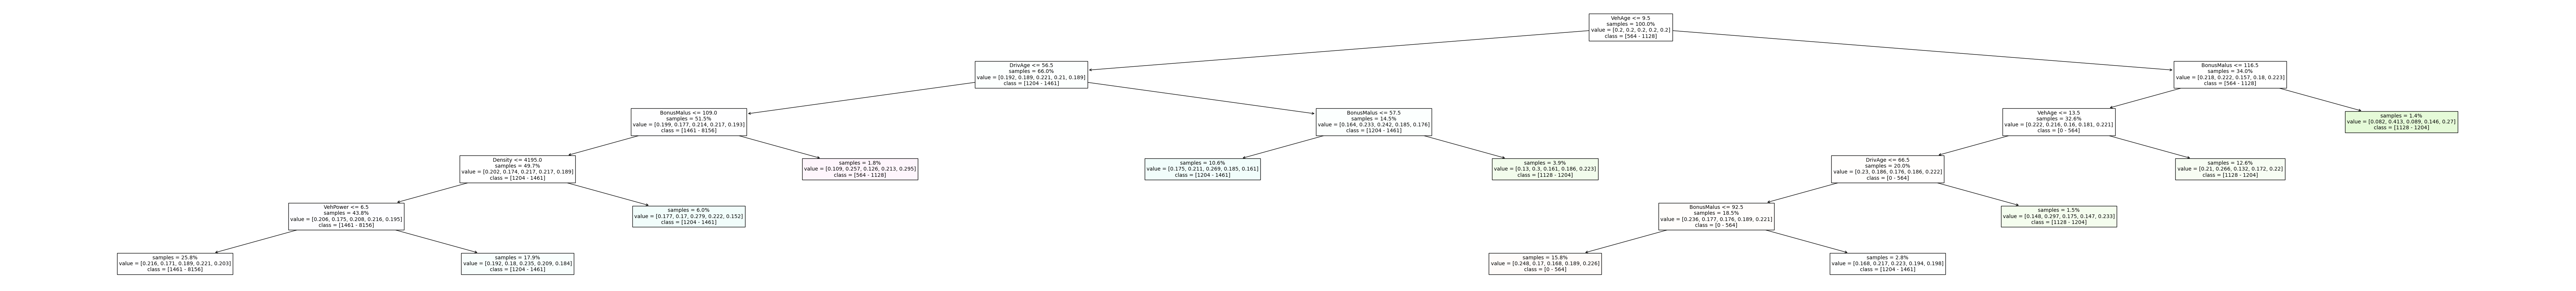

In [63]:
fig = plt.figure(figsize=(90,10))
plot_tree(clfs,
              feature_names=list(Xs.columns),
              class_names=list(clfs.classes_),
              impurity = False,
              proportion = True,
              filled=True,
              rounded=False,
              fontsize=10)
plt.show()

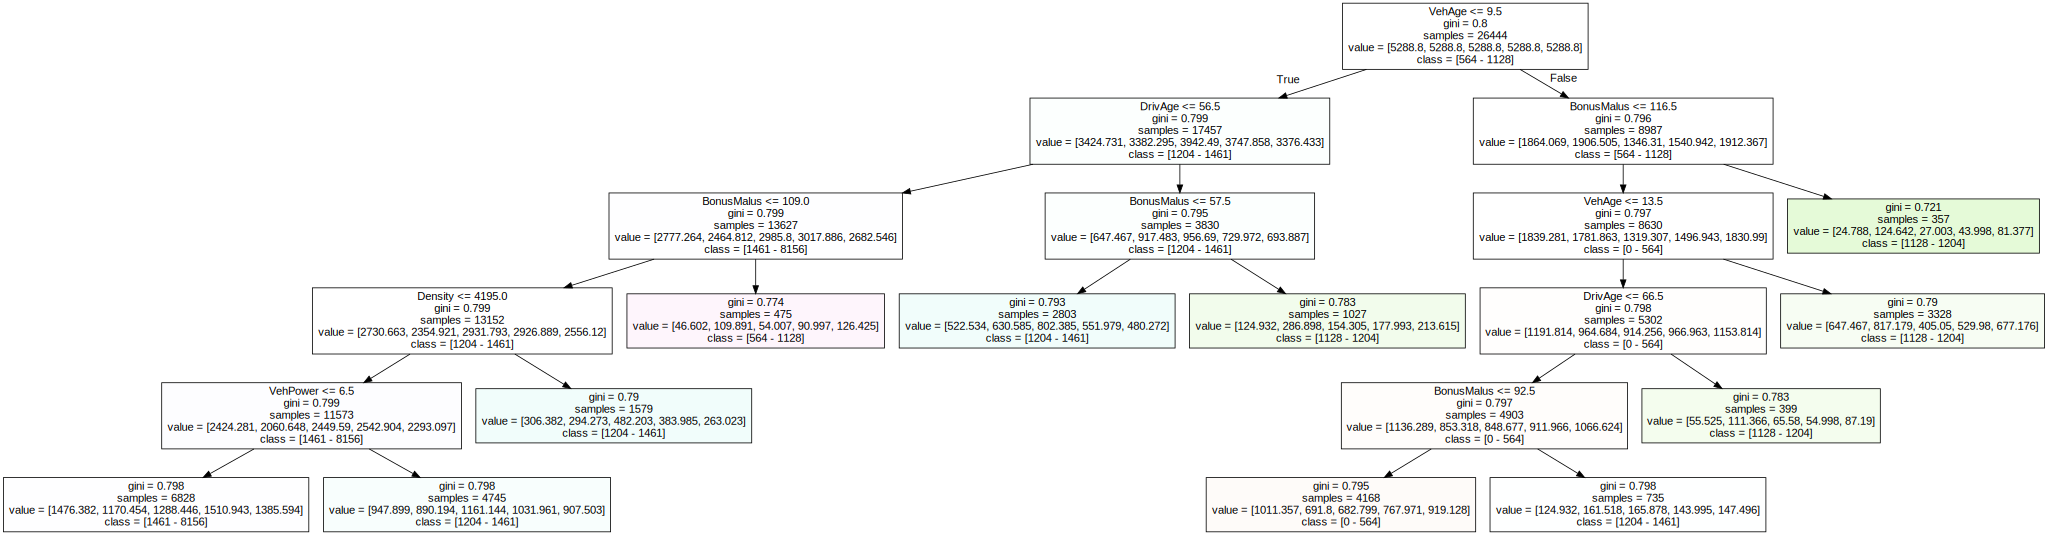

In [64]:
graph_file = export_graphviz(clfs, out_file = None, feature_names = Xs.columns, filled = True,class_names=clfs.classes_)
# Draw graph
graph = graphviz.Source(graph_file, format="png")
graph

In [65]:
# Check feature importance
importances = clfs.feature_importances_
feature_importance = pd.Series(importances, index=Xs.columns)
print(feature_importance.sort_values(ascending=False))

VehAge        0.364379
BonusMalus    0.349773
DrivAge       0.162808
Density       0.067485
VehPower      0.055556
dtype: float64


# 9 Model instability <a name="model_instability"></a>

As seen in the theoretical session, decision trees are very sensitive to data variations. A small change in the dataset used to train the model can produce big changes in the structure of the decision tree. The code below aims to illustrate this point. Two training datasets are selected from the data on severity of claims. The first one contains the first 3000 observations, while the second contains 3000 observations, but starting from observation 1000. The two trees obtained using these two training datasets are different.

In [66]:
mtpl_sev_1 = mtpl_sev[1:3000]
mtpl_sev_2 = mtpl_sev[1000:4000]

In [67]:
Xs_1 = mtpl_sev_1.drop(columns=["ClaimNb", "IDpol", "Exposure", "Area", "VehBrand", "VehGas", "Region", "ClaimAmount","claim_amount_binned_custom_label","claim_amount_capped"])
ys_1 = mtpl_sev_1["claim_amount_binned_custom_label"]
clfs_1 = DecisionTreeClassifier(max_depth=3,class_weight='balanced').fit(Xs_1, ys_1)

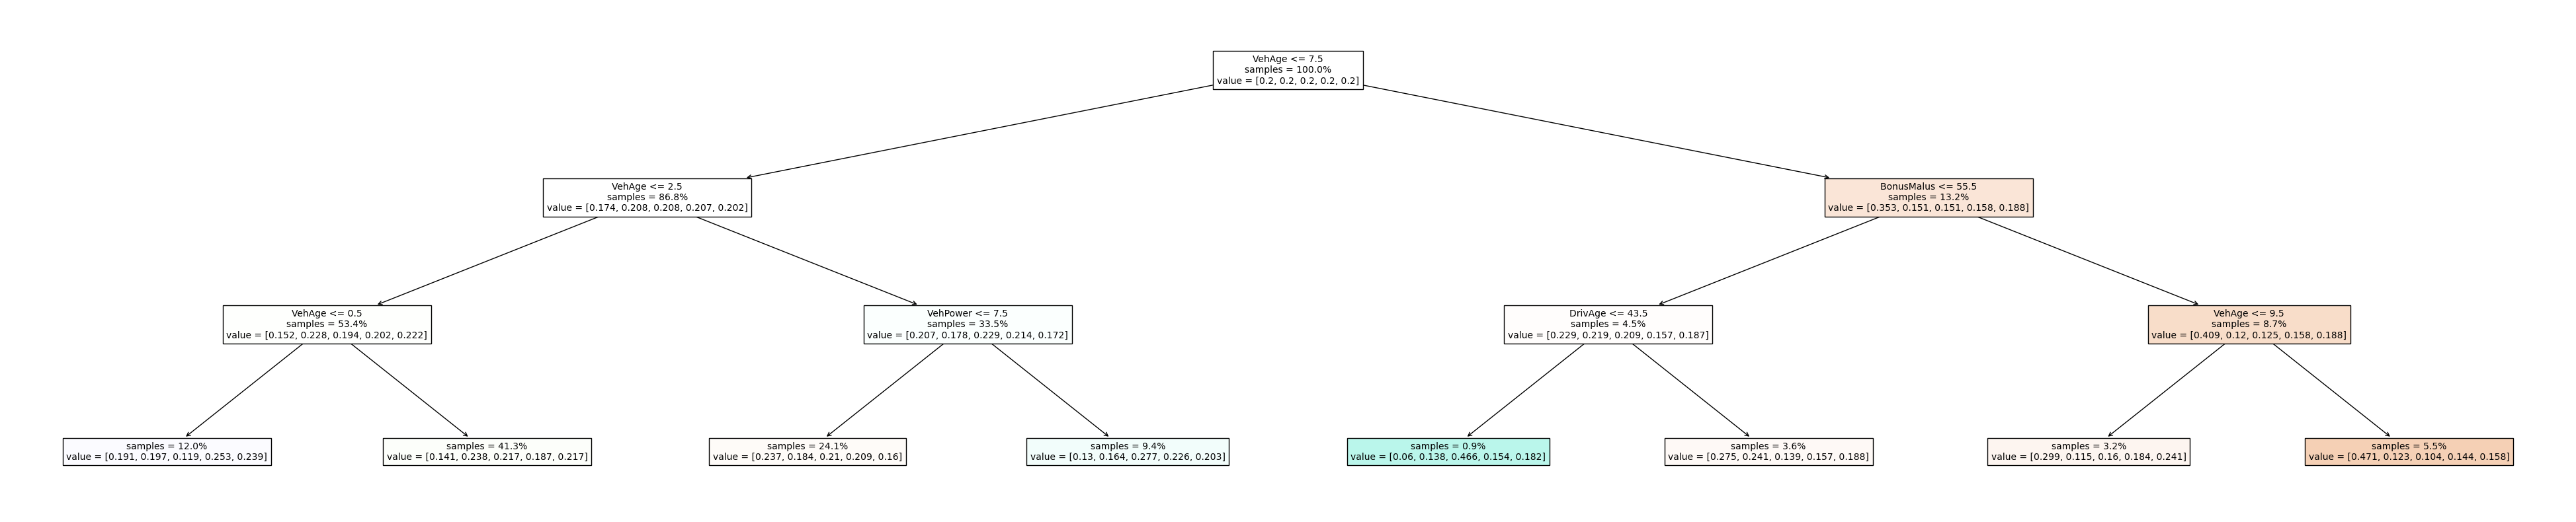

In [68]:
fig = plt.figure(figsize=(50,10))
plot_tree(clfs_1,
              feature_names=list(Xs_1.columns),
              impurity = False,
              proportion = True,
              filled=True,
              rounded=False,
              fontsize=10)
plt.show()

In [69]:
Xs_2 = mtpl_sev_2.drop(columns=["ClaimNb", "IDpol", "Exposure", "Area", "VehBrand", "VehGas", "Region", "ClaimAmount","claim_amount_binned_custom_label","claim_amount_capped"])
ys_2 = mtpl_sev_2["claim_amount_binned_custom_label"]
clfs_2 = DecisionTreeClassifier(max_depth=3,class_weight='balanced').fit(Xs_2, ys_2)

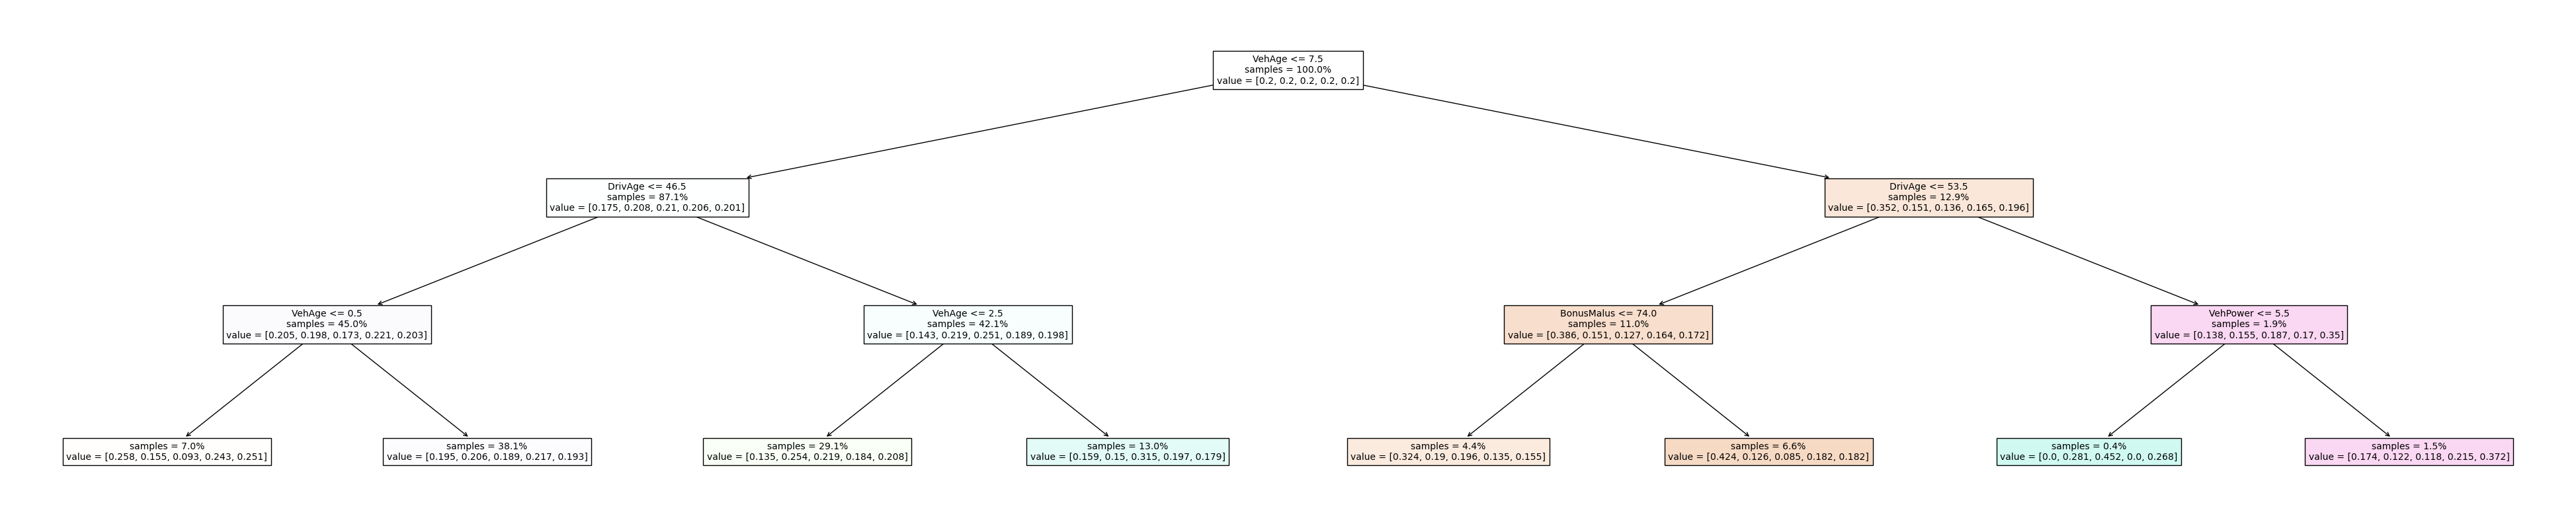

In [70]:
fig = plt.figure(figsize=(50,10))
plot_tree(clfs_2,
              feature_names=list(Xs_2.columns),
              impurity = False,
              proportion = True,
              filled=True,
              rounded=False,
              fontsize=10)
plt.show()

# 10. Summary <a name="summary"></a>

In this session, we covered how decision trees work, as well as their application in Python.
*   As a reminder from the theoretical session, some theoretical background information is first briefly summarized.
*   Regression and classification trees are introduced. The methodology to estimate criteria and perform node splitting is then practically presented.
*   Pruning and various stopping criteria are discussed in order to address potential overfitting issue.
*   The session concluded with two applications using actuarial data (claim frequency and claim severity data).